<a href="https://colab.research.google.com/github/DavidCastro88/ModeloDeML-ScoreCard/blob/main/Proyecto1G4FdeA2023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Modelos de Riesgo de Crédito***

##***Contexto del problema***

En el contexto de la industria financiera, la evaluación de riesgo crediticio es una parte crítica del proceso de toma de decisiones relacionado con la concesión de préstamos y créditos. Las instituciones financieras se enfrenta a varios desafíos al evaluar el riesgo crediticio de los solicitantes. Estos desafíos incluyen:

Precisión en la Evaluación: Evitar dar lugar a la aprobación de créditos para solicitantes de alto riesgo o la denegación de créditos a solicitantes solventes.

Mayor eficiencia en la toma de Decisiones: El proceso de evaluación de riesgo crediticio puede ser lento y costoso, lo que retrasa la respuesta a los solicitantes y aumenta los costos operativos de la institución financiera.

Minimización de Pérdidas: La institución financiera busca reducir las pérdidas debido a préstamos incobrables. Una evaluación de riesgo crediticio más precisa ayudaría a minimizar el riesgo de otorgar créditos a individuos con historiales crediticios problemáticos.

Competitividad del Mercado: En un mercado financiero competitivo, ofrecer tasas de interés y condiciones de crédito atractivas es esencial para atraer a nuevos clientes y retener a los existentes. Un modelo de score crediticio más preciso permite personalizar ofertas de crédito de manera más efectiva.


##***Objetivo:***

El objetivo de este proyecto es desarrollar un ScoreCrediticio que sea de utilidad tanto para los prestamistas o entidades bancarias al momento de tomar decisiones informadas sobre la aprobación o denegación de créditos, y para la población en general para reconocer su situción financiera en temas de endeudamiento y ver que características están teniendo más impacto en su score, la idea es poder poder plasmarlo en una aplicación  intuitiva para el usuario. En contexto el score crediticio es una medida fundamental en la toma de decisiones crediticias, ya que proporciona una evaluación cuantitativa de la solvencia y el historial crediticio de un individuo. La capacidad de predecir de manera precisa y eficiente el score crediticio de un solicitante es crucial para gestionar de manera efectiva el riesgo financiero y garantizar una cartera de crédito sólida. Utilizaremos algoritmos de Machine Learning, como clasificación supervisada, para entrenar y validar nuestro modelo, asegurándonos de que sea capaz de generalizar y proporcionar predicciones precisas en datos no vistos. El éxito de este proyecto se medirá por la capacidad del modelo para realizar predicciones de cumplimiento e incumplimiento de pagos a partir de un conjunto de datos históricos, y de generalizar adecuadamente con la realidad el score crediticio con un alto grado de precisión que serán verificadas con las métricas para dichos modelos, lo que va permitir mejorar la toma de decisiones crediticias, minimizar el riesgo de incumplimiento y proporcionar servicios financieros de manera más eficiente y responsable para los clientes.

##***Métodos empleados y objetivos de desarrollo***

Para el desarrollo del proyecto  se va contar con el siguiente orden de trabajo:

1. Previsualización de los datos históricos, entendimiento de las variables e hipótesis asociadas.

2. Visualización de los datos, tipos de variables, tipos de datos de las variables.

3. Limpieza de los datos: datos nulos, datos duplicados, manejo de datos atípicos y corrección superficial de los datos.

4. Análisis descriptivo de las variables.

5. Calculo del WoE e IV para la elección de variables a usar en el modelo.

6. Transformación de variables catégoricas y variables númericas.

7. Ajuste de modelos y análisis de las métricas obtenidas.

9. Creación del SCORECARD.

10. Resultados del SCORECARD.

11. Desarrollo de la aplicación.

Herramientas a utilizar:

 - Leguaje de programación: Python con el entorno en línea Colab.
 - herramientas para el desarrollo y despliegue de la aplicación...

# ***1. Previsualización de datos***

## ***1.1 Descripción de las variables preeliminares e hipótesis asociadas:***



Variable Target = loan_status = Describe el estado de un préstamo o crédito otorgado a un individuo o entidad. En este contexto, se utiliza para clasificar si un préstamo ha sido pagado adecuadamente (0 = no incumplimiento) o si ha resultado en un incumplimiento (1 = incumplimiento).

person_age = Edad de la persona en años, con respecto a nuestro target, bajo el sentido común no es tan probable determinar si una persona con mayor o menor edad puede ser o no un buen pagador, se puede analizar desde los dos puntos de vista, primero las personas mayores tienen más experiencia financiera, estabilidad laboral y una historia crediticia más larga, lo que podría hacer que sean más responsables con sus pagos, por tanto se espera que la probabilidad de ser un buen pagador aumente con la edad, pero por otro lado  las personas mayores pueden tener ingresos fijos limitados, dificultades financieras debido a jubilaciones o gastos médicos, o simplemente pueden ser más cautelosas al asumir deudas. En este caso, se esperaría que la probabilidad de no ser un buen pagador aumente con la edad.

person_income = Ingreso anual de la persona.
hipótesis: A mayor ingreso anual de la persona, más probable es que sea un buen pagador, ya que va tener más recursos para responder a sus obligaciones financieras.

person_home_ownership	= Se refiere al tipo de propiedad de la vivienda que posee una persona en un conjunto de datos. En este caso tenemos cuatro opciones:
Rent (Alquiler), Own (Casa propia), Mortage (Hipotecario), Other (Otros). Aunque hay desconocimiento de la categória Other, se plantea que:
hipótesis: Mientras la persona cuente con casa propia, va ser mucho más probable que pueda cumplir con el pago, a comparación de que la persona vive en casa alquilada.

person_emp_length = Cantidad de años que una persona lleva trabajando en su emplo actual.
hipótesis: A mayor número de años que la persona lleve en su trabajo, mayor probabilidad hay de que sea un buen pagador, ya que va contar con más estabilidad laboral para poder cumplir sus obligaciones.

loan_intent = Se refiere a la razón o propósito por la cual una persona o entidad solicita un préstamo. Tiene las siguientes catégorias: Personal, Education, Medical, Venture (Empresa), HomeImprovement (Arreglos para la casa), Debtconsolidation (Consolidar deudas exstentes en una sola).
hipótesis: Mientras el motivo del crédito sea para consolidar deudas existentes, para asuntos médicos o arreglos de la casa, va ser más probable que la persona sea mal pagador, esto porque no hay como un sentido que indique que puede haber una rentabilidad del dinero prestado, entonces hay más incertidumbre sobre el cumplimiento de las deudas, contrario al caso en el que fuera para una empresa o para propósitos de educación, donde hay más apalancamiento o almenos más esperanza de que la persona o entidad pueda cumplir sus deudas en un futuro.

loan_grade = Nivel del riesgo del prestámo categórias desde la A a la G, donde A representa el menor riesgo, y asciende hasta G, donde se representa un alto riesgo.
hipótesis muy obvia! : A menor riesgo (A-B) mayor va ser la probabilidad de que una persona cumpla con su pago.

loan_amnt = Monto del prestámo en unidad monetaria ($)
hipótesis: A mayor valor del prestámo más probabilidades de que la persona incumpla con sus obligaciones financieras.

loan_int_rate = Tasa de interés, se refiere a la cantidad de interés que se cobra a un prestatario por tomar un préstamo específico.
hipótesis: mientras mayor sea la tasa de interés va haber mayor probabilidad de incumplimiento.

loan_percent_income= proporción del prestámo sobre el ingreso, se refiere a lo que se va a requerir del ingreso de la persona para cumplir las obligaciones financieras.
hipótesis: Mientras mayor sea la proporción del prestámo sobre el ingreso, va ser más probable que la persona incumpla.

cb_person_default_on_file = Presencia o ausencia de incumplimientos en el historial crediticio de una persona, tiene dos categórias Y (si tiene incumplimientos), N (si no los tiene).
hipótesis: Una persona que tiene incumplimientos en su historial crediticio (Y) es más probable que no sea un buen pagador.

cb_preson_cred_hist_length = Longitud o duración del historial crediticio de una persona en años. La lógica de la variable por si sola no esque aparente dar mucha información, porque una persona puede tener un largo historial crediticio pero tener varios incumplimientos, entonces es dificil llegar a una hipótesis general que pueda relacionarse con la probabilidad de que una persona cumpla o incumpla.

In [82]:
#Librerias a utilizar

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Statistics & Mathematics
import scipy.stats as stats
import statsmodels.api as sm

# Preprocessing data
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer, FunctionTransformer

# Model Selection for Cross Validation
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split,TimeSeriesSplit

# Machine Learning metrics
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# ML classifiers
from sklearn.ensemble import (
    HistGradientBoostingClassifier, AdaBoostClassifier,
    RandomForestClassifier, GradientBoostingClassifier,
    StackingClassifier, VotingClassifier
    )
from sklearn.linear_model import LogisticRegression
# Randomizer
import random
# Encoder of categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [83]:
# Desactiva temporalmente las advertencias de tipo UserWarning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# ***2. Visualización de los datos***

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
#Cargamos la base de datos, le indicamos la ruta en donde se encuentra
data= pd.read_csv('/content/drive/Shareddrives/FdeAnaliticaG4/Proyecto1/credit_risk_dataset.csv', sep=',')
data


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Al hacer una previasualización de los datos nos damos cuenta que el dataset, cuenta con 12 variables, donde tenemos claramente nuestra variable dependiente o target (Y = loan_status) y otras 11 variables independientes, donde hay 4 variables categóricas  y 7 variables numéricas.  Para temas de practicidad vamos a redefinir las variables de la siguiente forma.

Redefinir variables:

Y = loan_status (Categórica) 1 Incumplimiento   0 No incumplimiento

X1 = person_age (Numérica)

X2 = person_income (Numérica)

X3 = person_home_ownership (Categórica)

X4 = person_emp_length (Numérica)

X5 = loan_intent (Categórica)

X6 = loan_grade (Categórica)

X7 = loan_amnt (Numérica)

X8 = loan_int_rate (Numérica)

X9 = loan_percent_income (Numérica)

X10 = cb_person_default_on_file (Categórica)

X11 = cb_person_cred_hist_length (Numérica)

In [86]:
#Redefinimos el nombre las variables.
data.rename(columns={'loan_status':'Y',
                     'person_age':'X1',
                     'person_income':'X2',
                     'person_home_ownership':'X3',
                     'person_emp_length':'X4',
                     'loan_intent':'X5',
                     'loan_grade':'X6',
                     'loan_amnt':'X7',
                     'loan_int_rate':'X8',
                     'loan_percent_income':'X9',
                     'cb_person_default_on_file':'X10',
                     'cb_person_cred_hist_length':'X11'
                     },
               inplace=True)
#Ponemos el target como primer columna del df
data = data[['Y','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']]
data.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,1,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,1,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4


In [87]:
#Descripción del tipo de varibles
data.dtypes

Y        int64
X1       int64
X2       int64
X3      object
X4     float64
X5      object
X6      object
X7       int64
X8     float64
X9     float64
X10     object
X11      int64
dtype: object

Al observar el tipo de dato que hay en cada variable, nos damos cuenta que hay concordancia en los datos que se observan en el head del dataframe, las variables de tipo object hacen referencia a las variables categóricas mientras que el resto a las variables númericas, esto quiere decir que es muy poco probable que hayan dos datos de distinto tipo en una misma columna, para cersiorarnos de eso vamos a ver resumidamente valores únicos por columna.

In [88]:
# Crear un nuevo DataFrame con los valores únicos por columna
valores_unicos_por_columna = pd.DataFrame({
    'Variable': data.columns,
    'Valores Únicos': [data[col].unique() for col in data.columns]
})
valores_unicos_por_columna

,Variable,Valores Únicos
0,Y,"[1, 0]"
1,X1,"[22, 21, 25, 23, 24, 26, 144, 123, 20, 32, 34,..."
2,X2,"[59000, 9600, 65500, 54400, 9900, 77100, 78956..."
3,X3,"[RENT, OWN, MORTGAGE, OTHER]"
4,X4,"[123.0, 5.0, 1.0, 4.0, 8.0, 2.0, 6.0, 7.0, 0.0..."
5,X5,"[PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIM..."
6,X6,"[D, B, C, A, E, F, G]"
7,X7,"[35000, 1000, 5500, 2500, 1600, 4500, 30000, 1..."
8,X8,"[16.02, 11.14, 12.87, 15.23, 14.27, 7.14, 12.4..."
9,X9,"[0.59, 0.1, 0.57, 0.53, 0.55, 0.25, 0.45, 0.44..."


In [89]:
data.nunique()

Y         2
X1       58
X2     4295
X3        4
X4       36
X5        6
X6        7
X7      753
X8      348
X9       77
X10       2
X11      29
dtype: int64

# ***3. Tratamiento de datos:***

## ***3.1 Identificación de datos faltantes***

  Vamos a identificar en cada variable (columna) donde hay ausencia de valores.

In [90]:
#Identicar valores vacíos
pd.DataFrame(data.isna().sum()).T

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,0,0,0,0,895,0,0,0,3116,0,0,0


Como se puede apreciar, en las variables X4 y X8, hay ausencia de valores, representando  el 2.74% y el 9.56% del total respectivamente, se va analizar más a fondo estas variables para ver que se hacen con estos valores faltantes, si se inputan o se borran, teniendo en cuenta el contexto de los datos.

In [91]:
resumen_columnas = data[['X4', 'X8']].describe()
resumen_columnas

,X4,X8
count,31686.000000,29465.000000
mean,4.789686,11.011695
std,4.142630,3.240459
min,0.000000,5.420000
25%,2.000000,7.900000
50%,4.000000,10.990000
75%,7.000000,13.470000
max,123.000000,23.220000


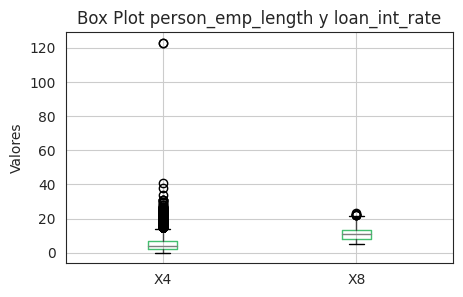

In [92]:
columns_to_plot = ['X4', 'X8']
plt.figure(figsize=(5, 3))
boxprops = {'color': plt.cm.viridis(0.7)}
data[columns_to_plot].boxplot(boxprops=boxprops)
plt.title('Box Plot person_emp_length y loan_int_rate')
plt.ylabel('Valores')
plt.show()

Realizando un resumen de estas dos variables, se observa que en la variable X4, hay una gran presencia de valores atípicos, valores bastante altos en comparación con el resto de valores, vemos por ejemplo que  el 75% de los datos están entre 0 y 7, lo cuál es bastante irreal llegar a ver datos de 123, osea que una persona lleve 123 años en su empleo actual. En cuanto a la variable X8 que hace referencia a la tasa de interés del prestámo también se aprecian algunos valores atipicos pero no tan alejados del rango intercuartilíco, y que puede ser más entendible la variabilidad al ser un tasa.

 En cuanto a la variable X8 que hace referencia a la tasa de interés del prestámo asociado, no podemos calcular la tasa de interés porque no tenemos información que identifique a la persona que hizo el préstamo en nuestros datos. Si tuviéramos esta información, podríamos estimar el interés promedio de esa persona o utilizar la última tasa de interés conocida que teníamos para ella. Esto se debe a que generalmente se espera que la tasa de interés se mantenga constante para un individuo a menos que se indique lo contrario. Sin embargo, como no contamos con esta información, no podemos asumir que todos los registros tienen una tasa de interés similar y calcular un promedio no sería una opción viable. Tampoco podemos asignar un valor de interés igual a cero, ya que esto implicaría que la tasa de interés es inexistente, lo cual no sería una representación precisa de la realidad, por lo tanto lo más viable es borrar los registros donde el valor de X8 sea nulo, teniendo como base de la decisión el contexto de los datos.

En cuanto a la variable X4 que representa la duración del empleo de las personas, es importante destacar que cada individuo tiene su propio historial y comportamiento crediticio único. Dado que estos datos pueden variar considerablemente de una persona a otra, podría ser sensato considerar su exclusión o eliminación del análisis, ya que asumir una medida de tendencia central para imputar los datos estaría diciendo que todas las personas tienen un comportamiento similar lo cual puede llegar afectar la lógica de los datos.

In [93]:
data['Y'].value_counts()

0    25473
1     7108
Name: Y, dtype: int64

Antes de borrar los registros, vamos a ver que tanto impacto tienen en el desbalance de clases, como se puede apreciar el 21.81% de los datos corresponde a la clase 1, antes de eliminar los datos nulos.

In [94]:
#Eliminamos los registros donde hayan datos vacíos
data=data.dropna(subset=['X4','X8'])
data.shape

(28638, 12)

In [95]:
data['Y'].value_counts()

0    22435
1     6203
Name: Y, dtype: int64

Se puede ver que el desbalance pasa del 21.81% al 21.66% representando una poca disminución, ahora se debe tener en cuenta que al borrar esos registros se puede perder información bastante importante, pero es algo que se va asumir por los argumentos anteriormente descritos.

## ***3.2 Identificación de registros duplicados***

In [96]:
data.duplicated().sum()

137

Para decidir si eliminamos los datos duplicados, vamos a ver que tanto afecta el balance en nuestro target, para no aumentar tal vez, el desbalance que hay con respecto a nuestra clase minoritaria.

In [97]:
data = data.drop_duplicates()
data['Y'].value_counts()

0    22313
1     6188
Name: Y, dtype: int64

Al borrar los datos duplicados el porcentaje de la clase minoritaria paso a ser 21.71% del total, lo que no tiene tanto impacto en el desbalance.

## ***3.3 Manejo de datos atípicos***

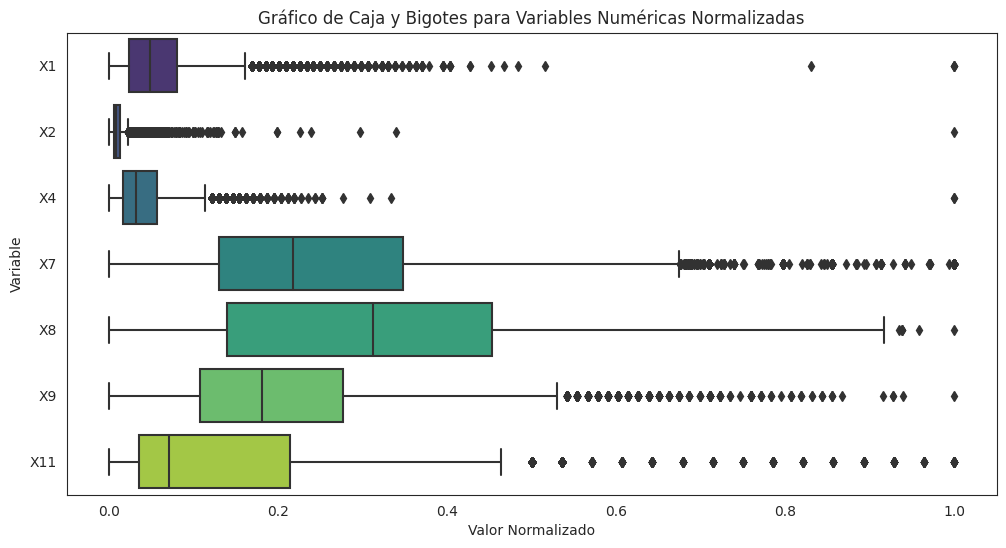

In [98]:
# Seleccionar columnas numéricas
numeric_columns = data.select_dtypes(include='number').drop('Y', axis=1)
scaler = MinMaxScaler()
normalized_numeric_columns = scaler.fit_transform(numeric_columns)
normalized_df = pd.DataFrame(normalized_numeric_columns, columns=numeric_columns.columns)
plt.figure(figsize=(12, 6))
colors = sns.color_palette('viridis', len(normalized_df.columns))
sns.boxplot(data=normalized_df, orient='h', palette=colors)
plt.title('Gráfico de Caja y Bigotes para Variables Numéricas Normalizadas')
plt.xlabel('Valor Normalizado')
plt.ylabel('Variable')
plt.show()

Como se puede ver en el gráfico de cajas y bigotes en todas la variables hay presencia de valores atípicos, que no necesariamente sean datos erróneos, pero para mayor detalle se va analizar cada variable en el contexto de los datos, para tomar la decisión de que se hace con esos registros.

Para la variable X1, que hace referencia la edad de la persona, se observaron datos que en la realidad sería muy poco probables, valores de 123 y 144 años, por lo que se van a modificar con la mediana para evitar perder los registros.

Para la variable X2, referente al ingreso de la persona, se van aceptar valores atípicos ya que este valor si puede llegar a tener mucha variabilidad, y es importante que los modelos la tengan en cuenta.

Para la variable X4 de la duración que la persona ha estado empleada en años, vemos dos valores imposibles hasta de 123 años, que serán modificados con la mediana, para todos aquellos valores superiores a 100 años.  

La variable X7, que describe la cantidad de dinero que una persona solicita como préstamo, tiene también un intervalo más amplio de aceptación de los valores, en el sentido de que puede tener mucha variación.

Las variables X8, X9 y X11, relacionadas con la tasa de interés del prestámo, la proporción del ingreso de una persona que se destina al pago, y la historia crediticia de una persona, respectivamente, aunque hayan valores atípicos no se van a modificar tampoco ya que es importante también considerar esa posible variabilidad que puede haber en el contexto crediticio.



In [99]:
#Corrección varible X1
# Calcular la mediana de la columna excluyendo los valores a cambiar
medianaX1 = data[data['X1'].isin([123, 144]) == False]['X1'].median()
# Reemplazar los valores
data['X1'] = data['X1'].replace([123, 144], medianaX1)

#Corrección varible X4
# Calcular la media de los valores que no son mayores o iguales a 100
medianaX4 = data[data['X4'] < 100]['X4'].median()
#Reemplazar los valores mayores o iguales a 100 por la media calculada
data.loc[data['X4'] >= 100, 'X4'] = medianaX4

# ***4. Análisis descriptivo***

***4. Análisis descriptivo de variables númericas***

In [100]:
num_cols = data.select_dtypes(include='number')
# Calculo de las estadísticas básicas
summary_stats = num_cols.describe().transpose()
# Renombra las columnas para mayor claridad
summary_stats = summary_stats.rename(columns={'mean': 'media', '50%': 'mediana'})
summary_stats

,count,media,std,min,25%,mediana,75%,max
Y,28501.0,0.217115,0.412289,0.00,0.00,0.00,0.00,1.00
X1,28501.0,27.722852,6.176804,20.00,23.00,26.00,30.00,84.00
X2,28501.0,66654.411319,62376.028215,4000.00,39500.00,56000.00,80000.00,6000000.00
X4,28501.0,4.781797,4.037804,0.00,2.00,4.00,7.00,41.00
X7,28501.0,9658.533034,6329.604672,500.00,5000.00,8000.00,12500.00,35000.00
X8,28501.0,11.045385,3.230748,5.42,7.90,10.99,13.48,23.22
X9,28501.0,0.169517,0.106410,0.00,0.09,0.15,0.23,0.83
X11,28501.0,5.800498,4.042153,2.00,3.00,4.00,8.00,30.00


De las estadisticas básicas de centralidad y posición de los datos, podemos confirmar la presencia de valores atipicos en casi todos los datos, pero como se menciono anteriormente en el contexto crediticio se puede llegar a tener mucha variabilidad en los datos, porque las condiciones entre una persona y otra son muy diferentes.

Un análisis preeliminar en el caso de variable respuesta, es el desbalanceo de los datos entre las personas que cumplen y que no cumplen con el pago del crédito, que como se menciono antes el 21.66% de los registros de las personas pertenecen a personas que incumplieron, haciendo un análisis de lo que sucede en la realidad en el contxto crediticio, el comportamiento del desbalance observado es muy normal, además si se hace un submuestreo para equiparar la cantidad de datos en cada clase, se podría perder información valiosa, por tanto se va trabajar con el desbalance esperando que los modelos puedan aprender los patrones en los datos.

## ***4.1 Distribución de las variables numéricas***

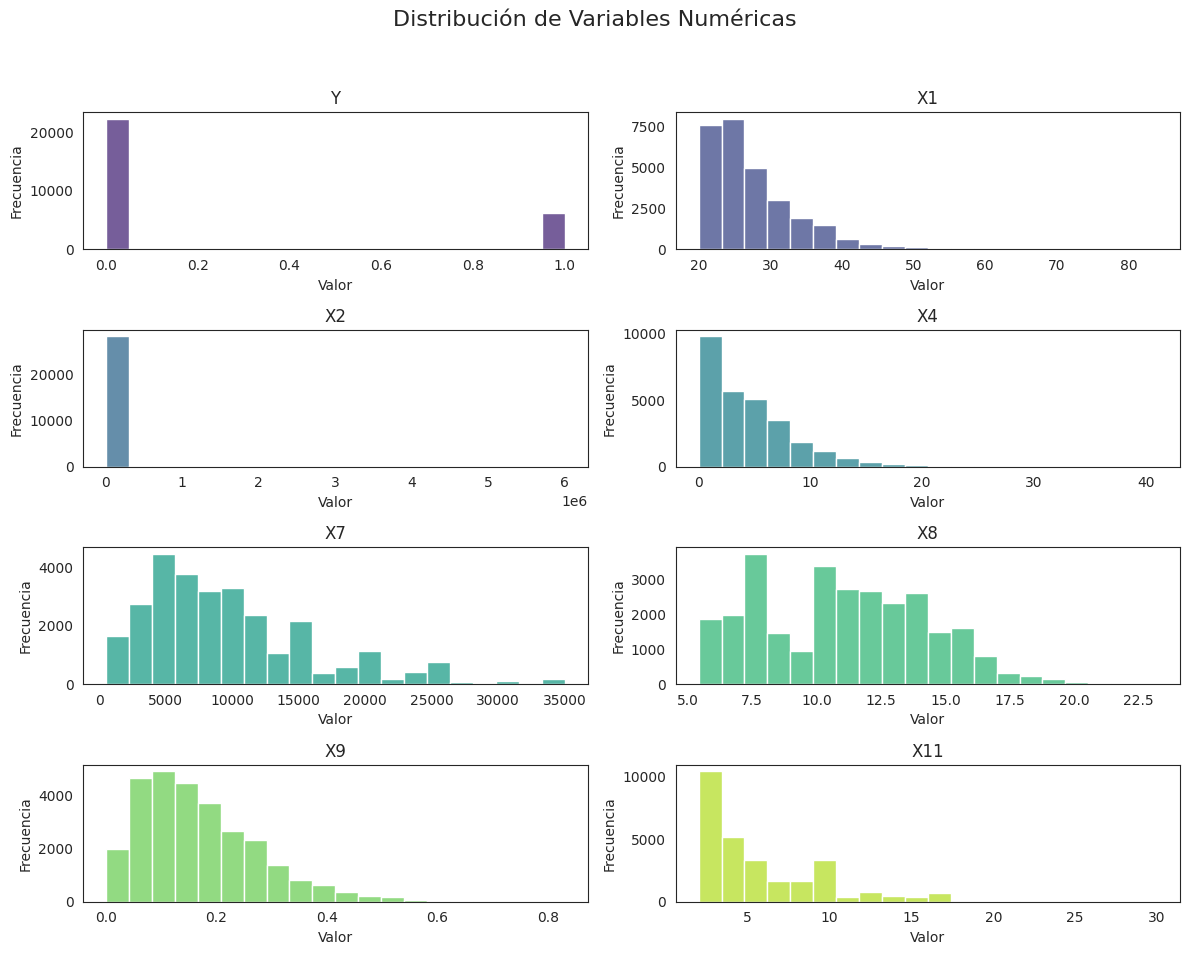

In [101]:
# @title Texto de título predeterminado
numeric_columns = data.select_dtypes(include=['number'])
# Normalizar las variables utilizando Min-Max
scaler = MinMaxScaler()
normalized_numeric_columns = scaler.fit_transform(numeric_columns)
normalized_df = pd.DataFrame(normalized_numeric_columns, columns=numeric_columns.columns)

# Configurar el estilo 'viridis' de Seaborn
sns.set_palette("viridis")

# Crear el subplot para los histogramas
num_columns = 2
num_rows = 4
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 10))

# Obtener la paleta 'viridis' completa
colors = sns.color_palette("viridis", n_colors=normalized_df.shape[1])

# Iterar a través de las columnas numéricas y crear un histograma para cada una
for i, col in enumerate(numeric_columns.columns):
    ax = axes[i // num_columns, i % num_columns]

    # Usar un color diferente de la paleta 'viridis' para cada histograma
    sns.histplot(data[col], bins=20, color=colors[i], ax=ax)

    ax.set_title(col)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')

# Ajustar el diseño del gráfico
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Eliminar ejes vacíos
for i in range(numeric_columns.shape[1], num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

# Mostrar el gráfico
plt.show()

A nivel general se ve como están distribuidas las variables, no se identifican distribuciones normales en ninguna de las variables, para el caso de X2 sucede algo muy particular y esque no se logra ver bien la distribución de los datos por esos valores "atípicos" que son en verdad muy extremos teniendo en cuenta que la media es de 66649, y hay valores hasta de 6000000 lo cuál afecta la visibilidad de los rangos de los valores en el histograma.

Hacemos uso de la matriz de correlaciones para entender cómo las variables numéricas se relacionan con nuestra variable objetivo y variables independientes entre sí. Esta matriz nos muestra principalmente si existe una relación lineal entre las variables. Sin embargo, es importante recordar que, incluso si dos variables tienen una relación débil según la correlación, aún podrían estar relacionadas de otras maneras, como en una forma cuadrática o exponencial. Además, esta herramienta también nos ayuda a comenzar a confirmar las hipótesis que se hicieron en la previsualización y entendimiento de los datos.

## ***4.2 Análisis de correlación***

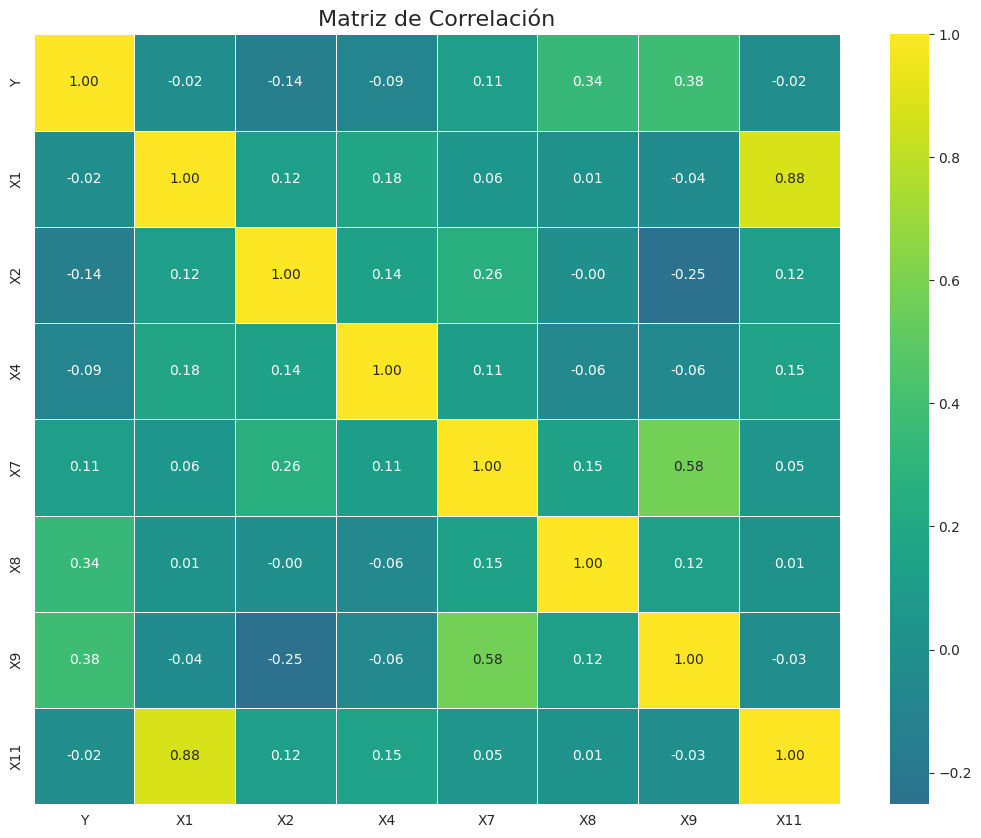

In [102]:
# Calcular la matriz de correlación
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(13, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

A partir de la matriz de correlaciones, se puede ver que con respecto al target:

Solo las variables X8 y X9 tienen una correlación positiva moderada,representando que a mayor tasa de interés mayor va ser la probabilidad de incumplimiento y que a mayor proporción del prestámo sobre el ingreso también va ser mayor la probabilidad de incumplimiento, afirmaciones muy relacionadas con las hipotésis iniciales.

La variable X7 representa una correlación débil positiva, que aunque dice que la relación lineal no es muy marcada, mientras mayor sea el monto del prestámo, hay mayor probabilidad de incumplimiento.

La variable X2 representa una correlación débil negativa, que aunque no sea muy significativa, representa a mayor ingreso de la persona menor va ser la probabilidad de incumplimiento.

El resto de variables X1, X4 Y X11 presentan una correlación casi nula, que nos estaría diciendo que no existe una relación lineal con nuestro target, para ver si existe otra relación no lineal entre esta variables con el target se van mirar otros gráficos.

También se aprecia algunas correlaciones positivas fuertes entre variables independientes, como por ejemplo entre:

X1 y X11, que representa que a mayor edad de la persona, mayor va ser la longitud del historial crediticio de una persona, situación que tiene mucho sentido con la realidad.

X9 y X7, representando que a mayor proporción del prestámo sobre el ingreso mayor va a ser la tasa de interés que en el contexto crediticio es muy común por las politicas de los prestamistas, ya que de cierto modo es una medida para la gestión del riesgo y el apalancamiento financiero del prestámo.

Vamos a ver para las variables X1, X4 y X1, si se identifica algún otro tipo de relación que no sea lineal, respecto a la variable target.

Variable X1 => Edad de la persona.
Como se ve en los histogramas para las edades, el mayor número de registros son de personas jóvenes, entre los 20 y 30 años, por lo que se van a dividir las edades en 4 intervalos, entre 20 y 25, 25 y 30, 30 y 40, y personas de 40 años en adelante y se va analizar si hay alguna relación con la variable respuesta, ya que en este caso se busca ver la relación de una variable númerica vs una variable binaria, se va hacer uso de un gráfico de dispersión de barras promedio.

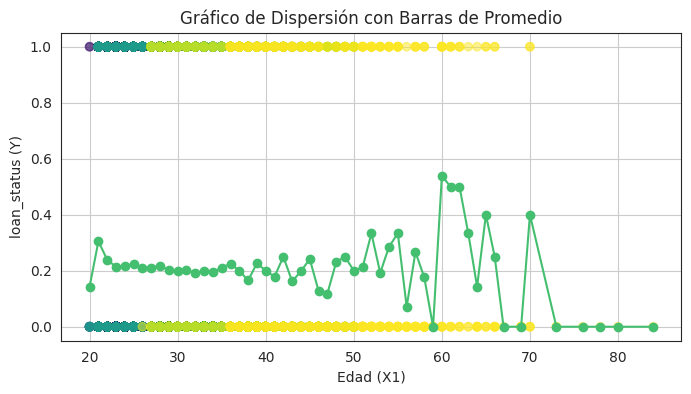

In [103]:
#Gráfico de dispersión con barras de promedio
data_prueba_X1 = data.copy()
promedios = data_prueba_X1.groupby('X1')['Y'].mean().reset_index()
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(data_prueba_X1['X1'])))
tono_morado = cmap(0.7)
plt.figure(figsize=(8, 4))
scatter = plt.scatter(data_prueba_X1['X1'], data_prueba_X1['Y'], alpha=0.5, c=colors)
plt.plot(promedios['X1'], promedios['Y'], color=tono_morado, marker='o', linestyle='-')
plt.xlabel('Edad (X1)')
plt.ylabel('loan_status (Y)')
plt.title('Gráfico de Dispersión con Barras de Promedio')
plt.grid(True)
plt.show()

Como se puede apreciar no hay un patrón claro, que demuestre la relación entre la edad y el cumplimiento de los pagos de las personas, este gráfico muestra por cada valor de la edad el promedio o porcentaje de personas que incumplieron con el pago, se puede observar que al inicio el hay cierta estabilidad, más o menos un 20% de las personas incumplian, hasta los 40 años donde se ve mucha irregularidad con los promedios, llegando alcanzar valores más allá del 50%, pero teniendo en cuenta que en las edades más altas hay menos cantidad de registros, por lo que se va a ver la proporción de personas que incumplieron por cada intervalo de edad mencionado anteriormente.

In [104]:
#División de intervalos de las edades.
bins_X1 = [20,25, 30, 40, float('inf')]   #[20, 25), [25, 30), [30, 40), [40, inf)
labels_X1 = ['20-25','25-30','30-40', '40+']
data_prueba_X1['Edad_intervalo'] = pd.cut(data_prueba_X1['X1'], bins=bins_X1, labels=labels_X1, right=False)
num_personas_X1 = data_prueba_X1['Edad_intervalo'].value_counts().reset_index()
num_personas_X1.columns = ['Edad_intervalo', 'Numero_de_Personas']
porcentaje_incumplen_X1 = (
    data_prueba_X1.groupby('Edad_intervalo')['Y']
    .mean()
    .mul(100)
    .reset_index(name='Porcentaje_Incumplimiento (%)')
)
tabla_final_X1 = pd.merge(num_personas_X1, porcentaje_incumplen_X1, on='Edad_intervalo')
tabla_final_X1

,Edad_intervalo,Numero_de_Personas,Porcentaje_Incumplimiento (%)
0,20-25,10705,23.129379
1,25-30,9865,21.388748
2,30-40,6404,20.112430
3,40+,1527,20.563196


Acá vemos que es muy similar el porcentaje de incumplimiento entre los rangos de edades teniendo en cuenta que el último intervalo solo presenta el 5.34% de los datos. Esto demuestra la hipótesis mencionada al inicio, y es que no es correcto afirmar que a medida que la edad de la persona aumenta va haber más probabilidad de cumplimiento o incumplimiento, esta variable es independiente de la edad, y refuerza lo observado en la matriz de correlaciones. Con este análisis ya pensaríamos si en verdad la variable es importante para el objetivo del modelo.

Variable X4 => Duración del empleo actual.
Como se ve en los histogramas para esta variable, el mayor número de registros esta entre 1 y 4 años, por lo que se van a dividir las edades en 4 intervalos, entre 0 y 2, 2 y 4, 4 y 7, y de 7 años en adelante que son los cuartiles identificados en el resumen de estadísticas y se va analizar si hay alguna relación con la variable respuesta.

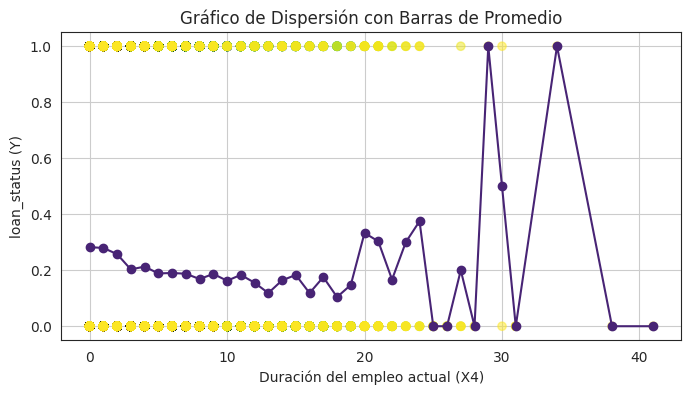

In [105]:
#Gráfico de dispersión con barras de promedio
data_prueba_X4 = data.copy()
promedios = data_prueba_X4.groupby('X4')['Y'].mean().reset_index()
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(data_prueba_X1['X4'])))
tono_morado = cmap(0.1)
plt.figure(figsize=(8, 4))
plt.scatter(data_prueba_X4['X4'], data_prueba_X4['Y'], alpha=0.5, c=colors)
plt.plot(promedios['X4'], promedios['Y'], color=tono_morado, marker='o', linestyle='-')
plt.xlabel('Duración del empleo actual (X4)')
plt.ylabel('loan_status (Y)')
plt.title('Gráfico de Dispersión con Barras de Promedio')
plt.grid(True)
plt.show()

En este caso podemos ver de cierta forma reflejada la correlación débil pero negativa en la matriz de correlaciones, que dice que a medida que una persona lleva más años en su empleo actual hay menos porbabilidades de incumplimiento (relación débil), hasta cierta parte se ve este comportamiento pero hay que tener en cuenta que el 75% de los datos son menores a o iguales 7 años, entonces esos datos que vemos hasta 40 podrían ser datos más irregulares de más pocos casos. En general no hay un patrón lineal, cuadrático o exponencial, que se logre identificar fácilmente lo que pone en duda la relación con la variable objetivo.

In [106]:
# División de intervalos de la duración de los empleos.
bins_X4 = [0, 2, 4, 7, float('inf')] #[0, 2), [2, 4), [4, 7), [7, inf)
labels_X4 = ['0-2', '2-4', '4-7', '7+']
data_prueba_X4['Duracion_empleo_intervalo'] = pd.cut(data_prueba_X4['X4'], bins=bins_X4, labels=labels_X4, right=False)
num_personas_X4 = data_prueba_X4['Duracion_empleo_intervalo'].value_counts().reset_index()
num_personas_X4.columns = ['Duracion_empleo_intervalo', 'Numero_de_Personas']
porcentaje_incumplen_X4 = (
    data_prueba_X4.groupby('Duracion_empleo_intervalo')['Y']
    .mean()
    .mul(100)
    .reset_index(name='Porcentaje_Incumplimiento (%)')
)
tabla_final_X4 = pd.merge(num_personas_X4, porcentaje_incumplen_X4, on='Duracion_empleo_intervalo')
tabla_final_X4['Duracion_empleo_intervalo'] = pd.Categorical(tabla_final_X4['Duracion_empleo_intervalo'], categories=['0-2', '2-4', '4-7', '7+'], ordered=True)
tabla_final_X4 = tabla_final_X4.sort_values('Duracion_empleo_intervalo')
tabla_final_X4

,Duracion_empleo_intervalo,Numero_de_Personas,Porcentaje_Incumplimiento (%)
3,0-2,6319,28.121538
2,2-4,6574,23.151810
1,4-7,7641,19.722549
0,7+,7967,17.346555


Acá si es más claro, la relación inversa que hay entre la duración del empleo actual con la variable objetivo, detectando que a mayor número de años, menor va ser la probabilidad de incumplimiento, lo que confirma la hipótesis inicial. Ahora bien, no se pudo identificar un patrón claro, y la correlación sigue siendo débil, por lo que se van a utilizar otros métodos más adelante para determinar que tanto impacto tiene esta variable en los modelos, si es importante conservarla o no.

Variable X11 => Duración del historial crediticio de la persona.
Como se ve en los histogramas para esta variable, el mayor número de registros esta entre 2 y 4 años, por lo que se van a dividir las edades en 4 intervalos, entre 2 y 3, 3 y 4, 4 y 7, y de 7 años que se toman en base a la distribución de los cuartiles observados en la tabla de estadisticas y se va analizar si hay alguna relación con la variable respuesta.

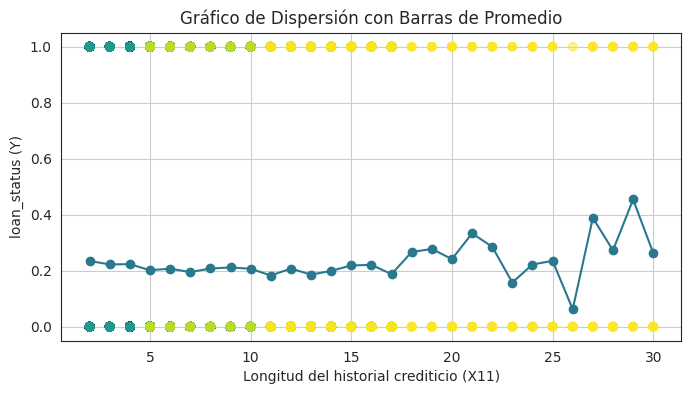

In [107]:
#Gráfico de dispersión con barras de promedio
data_prueba_X11 = data.copy()
promedios = data_prueba_X11.groupby('X11')['Y'].mean().reset_index()
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(data_prueba_X1['X11'])))
tono_morado = cmap(0.4)
plt.figure(figsize=(8, 4))
plt.scatter(data_prueba_X11['X11'], data_prueba_X11['Y'], alpha=0.5,c=colors)
plt.plot(promedios['X11'], promedios['Y'],color=tono_morado, marker='o', linestyle='-')
plt.xlabel('Longitud del historial crediticio (X11)')
plt.ylabel('loan_status (Y)')
plt.title('Gráfico de Dispersión con Barras de Promedio')
plt.grid(True)
plt.show()

En la gráfica se observa que desde los 2 hasta los 15 años no hay mucha variación, en este tramo  aproximadamente el 20% de las personas incumplen los pagos luego hay ciertas irregularidades, pero que en si no se evidencia una patrón claro de relación entre las variables.

In [108]:
# División de intervalos de la duración de los empleos.
bins_X11 = [2, 3, 4, 7, float('inf')]
labels_X11 = ['2-3', '3-4', '4-7', '7+'] # Intervalos: [2, 3), [3, 4), [4, 8), [7, inf)
data_prueba_X11['Long_historial_crediticio_intervalo'] = pd.cut(data_prueba_X11['X11'], bins=bins_X11, labels=labels_X11, right=False)
num_personas_X11 = data_prueba_X11['Long_historial_crediticio_intervalo'].value_counts().reset_index()
num_personas_X11.columns = ['Long_historial_crediticio_intervalo', 'Numero_de_Personas']
porcentaje_incumplen_X11 = (
    data_prueba_X11.groupby('Long_historial_crediticio_intervalo')['Y']
    .mean()
    .mul(100)
    .reset_index(name='Porcentaje_Incumplimiento (%)')
)
tabla_final_X11 = pd.merge(num_personas_X11, porcentaje_incumplen_X11, on='Long_historial_crediticio_intervalo')
tabla_final_X11['Long_historial_crediticio_intervalo'] = pd.Categorical(tabla_final_X11['Long_historial_crediticio_intervalo'], categories=['2-3', '3-4', '4-7', '7+'], ordered=True)
tabla_final_X11 = tabla_final_X11.sort_values('Long_historial_crediticio_intervalo')
tabla_final_X11

,Long_historial_crediticio_intervalo,Numero_de_Personas,Porcentaje_Incumplimiento (%)
3,2-3,5192,23.497689
2,3-4,5201,22.245722
1,4-7,8480,21.615566
0,7+,9628,20.544246


Por medio de los porcentajes de incumplimiento, observamos que existe una correlación débil pero negativa en la matriz de correlaciones. Esto significa que, en general, a medida que la longitud del historial crediticio aumenta, la probabilidad de incumplimiento tiende a disminuir, aunque esta relación es débil. En otras palabras, tener un historial crediticio más largo no tiene un impacto significativo en la variable objetivo, ya que la diferencia en los porcentajes de incumplimiento es pequeña. Esto plantea la pregunta de si deberíamos o no incluir esta variable en nuestros modelos.

## ***4.3 Análisis descriptivo de variables categóricas***



In [109]:
#Target
resumen_Y = data['Y'].value_counts().reset_index()
resumen_Y.columns = ['Categoría', 'Frecuencia']
resumen_Y.sort_values(by='Frecuencia', ascending=False)

,Categoría,Frecuencia
0,0,22313
1,1,6188


A simple vista se puede ver el gran desbalance que hay en los registros, donde el 78.29% pertenecen a personas que cumplieron los pagos, y solo 21.71% de las personas icumplieron con el pago.

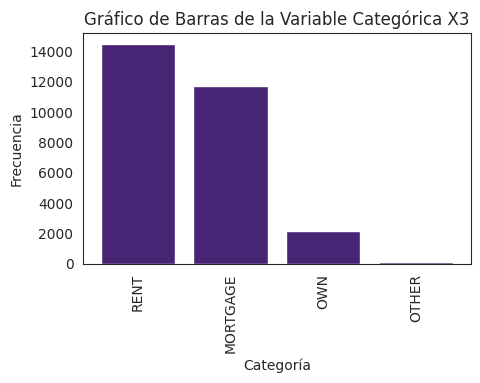

In [110]:
# Calcular la frecuencia de cada categoría en X3
frecuencia_x3 = data['X3'].value_counts()
cmap = plt.get_cmap('viridis')
color = cmap(0.1)
plt.figure(figsize=(5, 3))
plt.bar(frecuencia_x3.index, frecuencia_x3.values, color=color)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras de la Variable Categórica X3')
plt.xticks(rotation=90)
plt.show()

In [111]:
#Agrupamiento de categorías con respecto al target, para ver el porcentaje de incumplimiento asociado a cada categoría
count_by_home_owner_ship = data.groupby('X3')['Y'].value_counts().unstack(fill_value=0)
count_by_home_owner_ship['% de incumplimiento'] = (count_by_home_owner_ship[1] / (count_by_home_owner_ship[0] + count_by_home_owner_ship[1])) * 100
count_by_home_owner_ship

Y,0,1,% de incumplimiento
X3,,,
MORTGAGE,10253,1483,12.636333
OTHER,66,27,29.032258
OWN,2029,145,6.669733
RENT,9965,4533,31.266382


Se ve claramente que las personas que más incumplieron con sus obligaciones al momento de hacer un prestamo, son las personas que no contaban con vivienda propia, de las personas que se encontraban habitando un vivienda alquilada el 31.27% incumplieron.

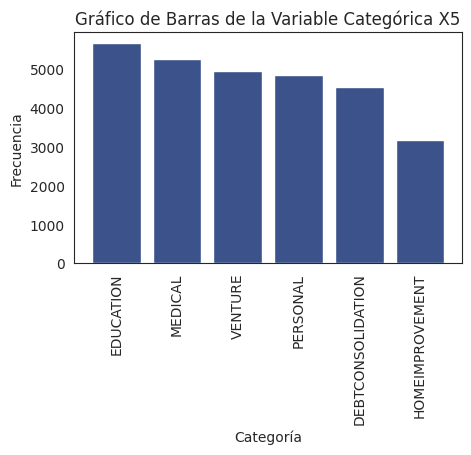

In [112]:
#X5
frecuencia_x5 = data['X5'].value_counts()
cmap = plt.get_cmap('viridis')
color = cmap(0.25)
plt.figure(figsize=(5, 3))
plt.bar(frecuencia_x5.index, frecuencia_x5.values, color=color)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras de la Variable Categórica X5')
plt.xticks(rotation=90)
plt.show()

In [113]:
count_by_intent = data.groupby('X5')['Y'].value_counts().unstack(fill_value=0)
count_by_intent['% de incumplimiento'] = (count_by_intent[1] / (count_by_intent[0] + count_by_intent[1])) * 100
count_by_intent

Y,0,1,% de incumplimiento
X5,,,
DEBTCONSOLIDATION,3253,1294,28.458324
EDUCATION,4703,967,17.054674
HOMEIMPROVEMENT,2367,820,25.729526
MEDICAL,3851,1418,26.912128
PERSONAL,3898,961,19.777732
VENTURE,4241,728,14.650835


Se puede apreciar que las personas que más incumplieron con sus obligaciones, fueron las que habían hecho el prestamo con el propósito de consolidar sus deudas (DEBTCONSOLIDATION), para asuntos médicos, y para el caso de mejora de vivienda.

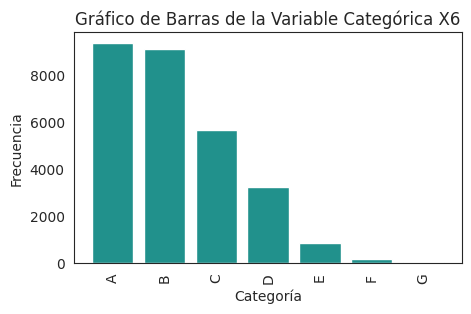

In [114]:
#X6
frecuencia_x6 = data['X6'].value_counts()
cmap = plt.get_cmap('viridis')
color = cmap(0.5)
plt.figure(figsize=(5, 3))
plt.bar(frecuencia_x6.index, frecuencia_x6.values, color=color)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras de la Variable Categórica X6')
plt.xticks(rotation=90)
plt.show()

In [115]:
count_by_loan_grade = data.groupby('X6')['Y'].value_counts().unstack(fill_value=0)
count_by_loan_grade['% de incumplimiento'] = (count_by_loan_grade[1] / (count_by_loan_grade[0] + count_by_loan_grade[1])) * 100
count_by_loan_grade

Y,0,1,% de incumplimiento
X6,,,
A,8447,898,9.609417
B,7646,1448,15.922586
C,4527,1155,20.327350
D,1322,1921,59.235276
E,307,562,64.672037
F,63,146,69.856459
G,1,58,98.305085


Se nota claramente que existe una fuerte conexión entre el nivel de riesgo de un préstamo y si la persona cumple con sus obligaciones o no. Cuanto mayor sea el riesgo asignado al préstamo, especialmente en las categorías D, E, F y G, mayor será la probabilidad de incumplimiento. Si es posible determinar este nivel de riesgo antes de otorgar el crédito, podría tener un impacto significativo en los resultados al usar el modelo, lo que sugiere que esta variable es muy importante para predecir el comportamiento del cliente.

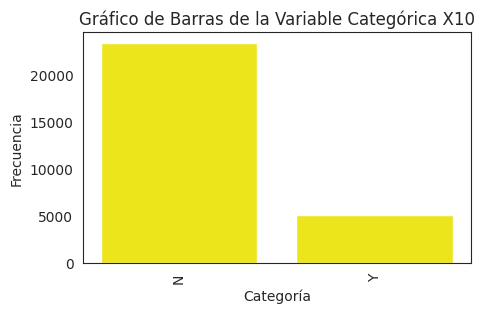

In [116]:
#X10
frecuencia_x10 = data['X10'].value_counts()
cmap = plt.get_cmap('viridis')
color = cmap(0.97)
plt.figure(figsize=(5, 3))
plt.bar(frecuencia_x10.index, frecuencia_x10.values, color=color)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras de la Variable Categórica X10')
plt.xticks(rotation=90)
plt.show()

In [117]:
count_by_x10 = data.groupby('X10')['Y'].value_counts().unstack(fill_value=0)
count_by_x10['% de incumplimiento'] = (count_by_x10[1] / (count_by_x10[0] + count_by_x10[1])) * 100
count_by_x10

Y,0,1,% de incumplimiento
X10,,,
N,19149,4262,18.205117
Y,3164,1926,37.838900


A simple vista parece que las variables categóricas tienen bastante impacto en el posible estado de cumplimiento del prestamo si se cumplen con estas obligaciones financieras o no.

In [118]:
data_prueba=data.copy()

# ***5. Cálculo del WoE e IV para la elección de variables a usar en el modelo***

El Weight of Evidence (WoE) y el Information Value (IV) son métricas utilizadas en el análisis de variables para evaluar su importancia y poder predictivo en el contexto de modelos de clasificación, especialmente en aplicaciones como el riesgo crediticio y el scoring crediticio.

El Weight of Evidence (WoE) es una métrica que cuantifica la fuerza de la relación entre una variable predictora y la variable objetivo en un modelo de clasificación. El WoE se calcula para cada categoría o valor de una variable predictora y se utiliza para medir cómo influye esa categoría en la probabilidad de ocurrencia del evento que se está prediciendo. En otras palabras, el WoE indica si una categoría específica aumenta o disminuye la probabilidad de que ocurra el evento.

WoE = In(Proporción de Buenos Resultados/Proporción de Malos Resultados)


El Information Value (IV) es una métrica que resume la importancia global de una variable predictora en un modelo de clasificación. El IV se calcula sumando las diferencias ponderadas entre los porcentajes de no eventos y eventos para todas las categorías de la variable predictora. En otras palabras, el IV mide cuánta información aporta una variable para predecir el evento.

IV = Σ (Proporción de Buenos Resultados - Proporción de Malos Resultados) * WoE

IV inferior a 0,02 indica que la característica es inútil para las predicciones.

• IV superior a 0,02 e inferior a 0,1 indica que la característica tiene un poder predictivo débil.

• IV superior a 0,1 e inferior a 0,3 indica que la característica tiene un poder predictivo medio.

• IV superior a 0,3 e inferior a 0,5 indica que la característica tiene un fuerte poder predictivo.

. Un IV superior a 0,5 puede ser sospechoso o demasiado bueno para ser verdad.

El criterio que se va usar para no descartar una variable, esque su IV sea cercano o mayor a 0.1, es decir que tenga un poder predictivo medio.

In [119]:
"""
Functión que me calcula el WoE y el IV,
recibe como parámetros:
     1. los datos
     2. la variable a la que le voy a calcular el WoE y el IV
     3. la variable objetivo
     4. El número de cuartiles que queremos usar, para el caso de las variables numéricas
retorna un df con la información relacionada del WoE e IV para la variable.
"""
def calculate_woe_iv(dataset, feature, target,num_cuartiles=None):
    if dataset[feature].dtype == 'object': #Si la variable es categórica
        lst = []
        #Calculamos las cantidades de buenos resultados y malos resultados por cada categoría.
        for val in dataset[feature].unique():
            lst.append({
                'Bin Values': val,
                'All': dataset[dataset[feature] == val].count()[feature],
                'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
                'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
            })
    else: #Si la variable es numérica
        lst = []
        #En este caso el woe y el iv se calculan por intervalos, por lo que se hace en primer lugar esa división
        bins=[dataset[feature].min()] #Añadimos el valor minimo, para que los contenedores empiecen desde ahí
        cuartiles = [dataset[feature].quantile(q) for q in [i / num_cuartiles for i in range(1, num_cuartiles)]]
        for cuartil in cuartiles: #Añadimos los cuartiles
          bins.append(cuartil)
        bins.append(float('inf'))
        dataset['binned'] = pd.cut(dataset[feature], bins,right=False)
        for val in dataset['binned'].unique():
            lst.append({
                'Bin Values': val,
                'All': dataset[dataset['binned'] == val].count()[feature],
                'Good': dataset[(dataset['binned'] == val) & (dataset[target] == 0)].count()[feature],
                'Bad': dataset[(dataset['binned'] == val) & (dataset[target] == 1)].count()[feature]
            })

    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum() #La proporción de buenos resultados
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum() #La proporción de malos resultados
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad']) #Cálculo del WOE
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE'] #Cálculo del IV
    dset = dset.sort_index()
    dset = dset.sort_values(by='Bin Values')  #Ordenamos con respecto al ascenso de los valores de los intervalos
    iv = dset['IV'].sum()
    return dset, iv

## ***5.1 WoE e IV para variables catégoricas***

In [120]:
#X3
resultados_WoE_IV_X3, iv_totalX3 = calculate_woe_iv(data_prueba, 'X3', 'Y')
resultados_WoE_IV_X3

,Bin Values,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
2,MORTGAGE,11736,10253,1483,0.459508,0.239657,0.650946,0.143111
3,OTHER,93,66,27,0.002958,0.004363,-0.388740,0.000546
1,OWN,2174,2029,145,0.090934,0.023432,1.356007,0.091532
0,RENT,14498,9965,4533,0.446601,0.732547,-0.494863,0.141504


In [121]:
#X4
resultados_WoE_IV_X5, iv_totalX5 = calculate_woe_iv(data_prueba, 'X5', 'Y')
resultados_WoE_IV_X5

,Bin Values,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
5,DEBTCONSOLIDATION,4547,3253,1294,0.145789,0.209114,-0.360718,0.022842
1,EDUCATION,5670,4703,967,0.210774,0.156270,0.299200,0.016308
4,HOMEIMPROVEMENT,3187,2367,820,0.106082,0.132515,-0.222483,0.005881
2,MEDICAL,5269,3851,1418,0.172590,0.229153,-0.283472,0.016034
0,PERSONAL,4859,3898,961,0.174696,0.155301,0.117687,0.002283
3,VENTURE,4969,4241,728,0.190069,0.117647,0.479696,0.034740


In [122]:
resultados_WoE_IV_X6, iv_totalX6 = calculate_woe_iv(data_prueba, 'X6', 'Y')
resultados_WoE_IV_X6

,Bin Values,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
3,A,9345,8447,898,0.378569,0.145120,0.958839,0.223840
1,B,9094,7646,1448,0.342670,0.234001,0.381442,0.041451
2,C,5682,4527,1155,0.202886,0.186652,0.083402,0.001354
0,D,3243,1322,1921,0.059248,0.310440,-1.656258,0.416038
4,E,869,307,562,0.013759,0.090821,-1.887212,0.145433
5,F,209,63,146,0.002823,0.023594,-2.123029,0.044097
6,G,59,1,58,0.000045,0.009373,-5.343001,0.049840


In [123]:
resultados_WoE_IV_X10, iv_totalX10 = calculate_woe_iv(data_prueba, 'X10', 'Y')
resultados_WoE_IV_X10

,Bin Values,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,N,23411,19149,4262,0.858199,0.688752,0.219954,0.037271
0,Y,5090,3164,1926,0.141801,0.311248,-0.786166,0.133213


In [124]:
#Resumen IV para variables categóricas
resumen_IV_cat = pd.DataFrame({'Variable':['X3','X5','X6','X10'],
                               'IV':[iv_totalX3,iv_totalX5,iv_totalX6,iv_totalX10]})
resumen_IV_cat

,Variable,IV
0,X3,0.376693
1,X5,0.098088
2,X6,0.922052
3,X10,0.170484


En los resultados obtenidos, vemos que las variables X3 y X6, tienen un poder predictivo muy fuerte, la variable X10 un poder predictivo fuerte, y la variable X5 tiene un poder predictivo débil, pero muy cercano a 0.1, por lo que ninguna de las variables categóricas va a ser descartada.

## ***5.2 WoE e IV para variables numéricas***

Para las variables numéricas, se van agrupar en contenedores, la cantidad de elementos en cada contenedor se determina respecto a los cuartiles, y el número de cuartiles se determina respecto a la cantidad de datos únicos que tiene cada variable.

In [125]:
resultados_WoE_IV_X1, iv_totalX1 = calculate_woe_iv(data_prueba, 'X1', 'Y',8)
resultados_WoE_IV_X1

,Bin Values,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,"[20.0, 22.0)",1062,740,322,0.033165,0.052036,-0.450459,0.008501
0,"[22.0, 23.0)",3144,2393,751,0.107247,0.121364,-0.123660,0.001746
3,"[23.0, 24.0)",3390,2665,725,0.119437,0.117162,0.019230,0.000044
2,"[24.0, 26.0)",5795,4517,1278,0.202438,0.206529,-0.020006,0.000082
4,"[26.0, 28.0)",4072,3214,858,0.144042,0.138655,0.038110,0.000205
6,"[28.0, 30.0)",3107,2455,652,0.110026,0.105365,0.043280,0.000202
5,"[30.0, 35.0)",4366,3500,866,0.156859,0.139948,0.114076,0.001929
7,"[35.0, inf)",3565,2829,736,0.126787,0.118940,0.063891,0.000501


In [126]:
resultados_WoE_IV_X2, iv_totalX2 = calculate_woe_iv(data_prueba, 'X2', 'Y',20)
resultados_WoE_IV_X2

,Bin Values,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,"[4000.0, 24000.0)",1370,543,827,0.024336,0.133646,-1.703253,0.186183
18,"[24000.0, 29000.0)",1409,969,440,0.043428,0.071105,-0.493068,0.013647
16,"[29000.0, 32000.0)",1328,744,584,0.033344,0.094376,-1.040417,0.063499
15,"[32000.0, 36000.0)",1588,1009,579,0.045220,0.093568,-0.727145,0.035156
19,"[36000.0, 39500.0)",1430,1005,425,0.045041,0.068681,-0.421904,0.009974
17,"[39500.0, 42000.0)",1059,896,163,0.040156,0.026341,0.421633,0.005825
13,"[42000.0, 45500.0)",1782,1365,417,0.061175,0.067388,-0.096734,0.000601
10,"[45500.0, 49668.0)",1434,1087,347,0.048716,0.056076,-0.140705,0.001036
14,"[49668.0, 52000.0)",1168,1018,150,0.045624,0.024240,0.632402,0.013523
3,"[52000.0, 56000.0)",1679,1307,372,0.058576,0.060116,-0.025962,0.000040


In [127]:
resultados_WoE_IV_X4, iv_totalX4 = calculate_woe_iv(data_prueba, 'X4', 'Y',7)
resultados_WoE_IV_X4

,Bin Values,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
5,"[0.0, 1.0)",3690,2648,1042,0.118675,0.168390,-0.349895,0.017395
2,"[1.0, 2.0)",2629,1894,735,0.084883,0.118778,-0.335982,0.011388
4,"[2.0, 3.0)",3453,2564,889,0.114911,0.143665,-0.223331,0.006422
0,"[3.0, 5.0)",5684,4505,1179,0.201900,0.190530,0.057964,0.000659
1,"[5.0, 6.0)",2696,2188,508,0.098059,0.082094,0.177704,0.002837
3,"[6.0, 9.0)",5870,4792,1078,0.214763,0.174208,0.209283,0.008487
6,"[9.0, inf)",4479,3722,757,0.166809,0.122334,0.310096,0.013792


In [128]:
resultados_WoE_IV_X7, iv_totalX7 = calculate_woe_iv(data_prueba, 'X7', 'Y',16)
resultados_WoE_IV_X7

,Bin Values,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,"[500.0, 2400.0)",1682,1355,327,0.060727,0.052844,0.139039,0.001096
3,"[2400.0, 3200.0)",1746,1372,374,0.061489,0.060440,0.017211,0.000018
5,"[3200.0, 4200.0)",1907,1534,373,0.068749,0.060278,0.131498,0.001114
4,"[4200.0, 5000.0)",1034,840,194,0.037646,0.031351,0.182986,0.001152
2,"[5000.0, 5856.25)",2538,2072,466,0.092861,0.075307,0.209526,0.003678
11,"[5856.25, 6300.0)",1760,1478,282,0.066239,0.045572,0.373980,0.007729
15,"[6300.0, 7200.0)",1615,1360,255,0.060951,0.041209,0.391419,0.007727
6,"[7200.0, 8000.0)",1015,822,193,0.036840,0.031189,0.166493,0.000941
13,"[8000.0, 9600.0)",2720,2195,525,0.098373,0.084842,0.147982,0.002002
10,"[9600.0, 10000.0)",366,290,76,0.012997,0.012282,0.056590,0.000040


In [129]:
resultados_WoE_IV_X8, iv_totalX8 = calculate_woe_iv(data_prueba, 'X8', 'Y',20)
resultados_WoE_IV_X8

,Bin Values,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
17,"[5.42, 6.03)",1257,1188,69,0.053243,0.011151,1.563362,6.580488e-02
14,"[6.03, 6.91)",1476,1357,119,0.060817,0.019231,1.151351,4.787983e-02
5,"[6.91, 7.4)",1516,1387,129,0.062161,0.020847,1.092528,4.513702e-02
12,"[7.4, 7.66)",1441,1289,152,0.057769,0.024564,0.855184,2.839668e-02
16,"[7.66, 7.9)",1129,1025,104,0.045937,0.016807,1.005499,2.929083e-02
9,"[7.9, 8.9)",1591,1386,205,0.062116,0.033129,0.628610,1.822190e-02
7,"[8.9, 9.76)",1537,1340,197,0.060055,0.031836,0.634664,1.790949e-02
13,"[9.76, 10.25)",1309,1103,206,0.049433,0.033290,0.395355,6.382152e-03
8,"[10.25, 10.65)",1431,1201,230,0.053825,0.037169,0.370273,6.167419e-03
11,"[10.65, 10.99)",882,732,150,0.032806,0.024240,0.302588,2.591822e-03


In [130]:
resultados_WoE_IV_X9, iv_totalX9 = calculate_woe_iv(data_prueba, 'X9', 'Y',20)
resultados_WoE_IV_X9

,Bin Values,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
11,"[0.0, 0.04)",1112,1008,104,0.045175,0.016807,0.988775,0.028050
13,"[0.04, 0.05)",873,766,107,0.034330,0.017292,0.685796,0.011685
6,"[0.05, 0.07)",2186,1955,231,0.087617,0.037330,0.853170,0.042903
12,"[0.07, 0.08)",1220,1079,141,0.048357,0.022786,0.752473,0.019242
10,"[0.08, 0.09)",1273,1093,180,0.048985,0.029089,0.521167,0.010369
17,"[0.09, 0.1)",1211,1057,154,0.047371,0.024887,0.643680,0.014473
1,"[0.1, 0.11)",1347,1170,177,0.052436,0.028604,0.606052,0.014443
15,"[0.11, 0.12)",1221,1067,154,0.047820,0.024887,0.653096,0.014977
19,"[0.12, 0.13)",1138,1008,130,0.045175,0.021008,0.765631,0.018503
8,"[0.13, 0.15)",2444,2104,340,0.094295,0.054945,0.540092,0.021253


In [131]:
resultados_WoE_IV_X11, iv_totalX11 = calculate_woe_iv(data_prueba, 'X11', 'Y',5)
resultados_WoE_IV_X11

,Bin Values,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,"[2.0, 3.0)",5192,3972,1220,0.178013,0.197156,-0.102139,0.001955
0,"[3.0, 4.0)",5201,4044,1157,0.181240,0.186975,-0.031154,0.000179
2,"[4.0, 5.0)",5189,4029,1160,0.180567,0.187460,-0.037459,0.000258
3,"[5.0, 9.0)",6620,5276,1344,0.236454,0.217195,0.084960,0.001636
4,"[9.0, inf)",6299,4992,1307,0.223726,0.211215,0.057545,0.000720


In [132]:
#Resumen IV para variables numéricas
resumen_IV_num = pd.DataFrame({'Variable':['X1','X2','X4','X7','X8','X9','X11'],
                               'IV':[iv_totalX1,iv_totalX2,iv_totalX4,iv_totalX7,iv_totalX8,iv_totalX9,iv_totalX11]})
resumen_IV_num

,Variable,IV
0,X1,0.013210
1,X2,0.556161
2,X4,0.060980
3,X7,0.090180
4,X8,0.780456
5,X9,0.915144
6,X11,0.004748


Podemos ver las variables X2, X8 y X9 tienen un poder predictivo muy fuerte, las variables X1, X11 y X4, se van a descartar ya que tienen un poder predictivo débil, la variable X7 si vien tiene un poder predictivo débil es cercano a 0.1 por lo que no se va descartar. Siendo así procedemos a eliminar y ver cuales fueron las características elegidas.


## ***5.3 Variables finales a utilizar en el modelo***

In [133]:
data_=data.drop(columns=['X1','X11','X4'])
data_.iloc[737]


Y                    0
X2               22800
X3                 OWN
X5     HOMEIMPROVEMENT
X6                   B
X7                4750
X8               11.36
X9                0.21
X10                  N
Name: 847, dtype: object

# ***6. Transformación de variables categóricas y variables númericas***


A continuación se van a realizar transformación de variables, aunque es importante tener en cuenta que **los datos van a tener siempre la misma base**, lo que va cambiar es la estructura en como serán ajustados por los modelos, se van a transformar de diferente maneras ya que según experiencias y experimentos de prueba-error se sabe que hay modelos que interpretan la estructura de los datos de una mejor manera que otras. Para nuestro caso en específico se van a ajustar tres modelos de clasificación:

Regresión Logística: En este caso todas las variables se van a convertir a binarias, en el caso de las categóricas se va utilizar la codificación OnehatEncoding en el que se crea una nueva columna por cada categória, si un registro pertenece a la categória entonces se pone un uno, y en el resto de categórias de la variable asociada se pone ceros.  Para el caso de las variables numéricas se van hacer divisiones en intervalos y se va hacer un procedimiento parecido, al convertirlas en variables dummys.

RandomForest: En este caso las variables categóricas X3 y X5, se van a transformar mediante OneHotEncoding ya que no hay una cardinalidad visible, la variable X10 que es Y o N, se transforma a binaria 1 o 0 respectivamente, y la variables X6, se van a cambiar las letras de la A hasta la G, por números del 1 al 7, ya que tiene relación con el riesgo del crédito, siendo A menor riesgo y G el de mayor riesgo, esto va representar la porporcionalidad que debe tener en el modelo.

KNN: Los datos para este modelo van hacer los mismos que para el RandomForest, pero al momento del ajuste, se van a estandarizar, ya que por experiencias (prueba y error), se nota una gran diferencia en las métricas  obtenidas.

## ***6.1 Transformación 1***

Para la variable X10, que tiene las catégorias Y, N, osea si una persona tiene (Y) o no tiene (N) un registro de incumplimiento de pagos en su historial crediticio, se van a traducir esas categórias a los valores binarios 1 y 0, respectivamente.

In [134]:
data_['X10'] = data_['X10'].replace({'Y': 1, 'N': 0})
data_['X10'].value_counts().reset_index()

,index,X10
0,0,23411
1,1,5090


In [135]:
#A partir de acá generamos dos copias de los datos como se menciono anteriormente,
#el primero va a ser para ajustar el modelo de regresión Logistica
#El segundo para ajustar los modelos de RandomForest y KNN
dataEnd1 = data_.copy()
dataEnd2 = data_.copy()

Para las variables categóricas X3, X5, y X6 se va utilizar la codificación One-HotEcoding, que lo que hace es crear una nueva variable por cada categória, y asignarle un al registro si pertenece a esa categória sino es cero en las otras columnas de la variable.


In [136]:
# Aplicar codificación one-hot a la columna 'X3' 'X5' y 'X6'
dataEnd1= pd.get_dummies(dataEnd1,columns=['X6'],prefix=['X6'])
dataEnd1 = pd.get_dummies(dataEnd1, columns=['X3'], prefix=['X3'])
dataEnd1 = pd.get_dummies(dataEnd1, columns=['X5'], prefix=['X5'])
dataEnd1

,Y,X2,X7,X8,X9,X10,X6_A,X6_B,X6_C,X6_D,...,X3_MORTGAGE,X3_OTHER,X3_OWN,X3_RENT,X5_DEBTCONSOLIDATION,X5_EDUCATION,X5_HOMEIMPROVEMENT,X5_MEDICAL,X5_PERSONAL,X5_VENTURE
0,1,59000,35000,16.02,0.59,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,9600,1000,11.14,0.10,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,9600,5500,12.87,0.57,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,1,65500,35000,15.23,0.53,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,1,54400,35000,14.27,0.55,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,0,53000,5800,13.16,0.11,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
32577,0,120000,17625,7.49,0.15,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
32578,1,76000,35000,10.99,0.46,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
32579,0,150000,15000,11.48,0.10,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [137]:
def generar_intervalos(dataset,feature,num_cuartiles):
  """
  Función para obtener los intervalos en los que se debe dividir una variable en especifico

  Parámetros:
    - dataset: DataFrame con los datos
    - feature: la variable
    - num_cuartiles: la cantidad de cuartiles que queremos usar para la división

    Retorna una lista con los valores inferiores de cada intervalo
  """
  bins=[dataset[feature].min()] #Añadimos el valor minimo, para que los contenedores empiecen desde ahí
  cuartiles = [dataset[feature].quantile(q) for q in [i / num_cuartiles for i in range(1, num_cuartiles)]]
  for cuartil in cuartiles: #Añadimos los cuartiles
    bins.append(cuartil)
  bins.append(float('inf'))
  return bins

def convertir_a_dummy(df, columnas, intervalos):
    """
    Convierte las columnas numéricas especificadas en variables dummy con intervalos dados.

    Parámetros:
    - df: DataFrame de los datos.
    - columnas: Lista de nombres de columnas a convertir en dummy.
    - intervalos: Lista de listas de intervalos correspondientes a cada columna.

    Retorna un nuevo DataFrame con las variables dummy agregadas y sin las columnas de intervalo.
    """
    df_nuevo = df.copy()

    for col, bins in zip(columnas, intervalos):
        intervalos_cortados = pd.cut(df_nuevo[col], bins=bins, right=False)
        variables_dummy = pd.get_dummies(intervalos_cortados, prefix=f'{col}')
        df_nuevo.drop(columns=[col], inplace=True)
        df_nuevo = pd.concat([df_nuevo, variables_dummy], axis=1)
    return df_nuevo

intervalos_x2=generar_intervalos(dataEnd1,'X2',20)
intervalos_x7=generar_intervalos(dataEnd1,'X7',16)
intervalos_x8=generar_intervalos(dataEnd1,'X8',20)
intervalos_x9=generar_intervalos(dataEnd1,'X9',20)

dataEnd1=convertir_a_dummy(dataEnd1,['X2','X7','X8','X9'],[intervalos_x2,intervalos_x7,intervalos_x8,intervalos_x9])
dataEnd1

,Y,X10,X6_A,X6_B,X6_C,X6_D,X6_E,X6_F,X6_G,X3_MORTGAGE,...,"X9_[0.15, 0.16)","X9_[0.16, 0.17)","X9_[0.17, 0.19)","X9_[0.19, 0.21)","X9_[0.21, 0.23)","X9_[0.23, 0.25)","X9_[0.25, 0.28)","X9_[0.28, 0.32)","X9_[0.32, 0.38)","X9_[0.38, inf)"
0,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
32577,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
32578,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32579,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [138]:
dataEnd1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28501 entries, 0 to 32580
Data columns (total 95 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Y                        28501 non-null  int64
 1   X10                      28501 non-null  int64
 2   X6_A                     28501 non-null  uint8
 3   X6_B                     28501 non-null  uint8
 4   X6_C                     28501 non-null  uint8
 5   X6_D                     28501 non-null  uint8
 6   X6_E                     28501 non-null  uint8
 7   X6_F                     28501 non-null  uint8
 8   X6_G                     28501 non-null  uint8
 9   X3_MORTGAGE              28501 non-null  uint8
 10  X3_OTHER                 28501 non-null  uint8
 11  X3_OWN                   28501 non-null  uint8
 12  X3_RENT                  28501 non-null  uint8
 13  X5_DEBTCONSOLIDATION     28501 non-null  uint8
 14  X5_EDUCATION             28501 non-null  uint8
 15  X5

## ***6.2 Transformación 2***

En este caso solo se van a transformar las variables X3 y X5 a variables dummy, y los grados de la variables X6 se modifican por su equivalente.

In [139]:
#Modificar variable loan_grade valores del 1 al 7
dataEnd2['X6'] = data_prueba['X6'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})
#Transformación mediante One-HotEncoding
dataEnd2 = pd.get_dummies(dataEnd2, columns=['X3'], prefix=['X3'])
dataEnd2 = pd.get_dummies(dataEnd2, columns=['X5'], prefix=['X5'])
dataEnd2.head()

,Y,X2,X6,X7,X8,X9,X10,X3_MORTGAGE,X3_OTHER,X3_OWN,X3_RENT,X5_DEBTCONSOLIDATION,X5_EDUCATION,X5_HOMEIMPROVEMENT,X5_MEDICAL,X5_PERSONAL,X5_VENTURE
0,1,59000,4,35000,16.02,0.59,1,0,0,0,1,0,0,0,0,1,0
1,0,9600,2,1000,11.14,0.10,0,0,0,1,0,0,1,0,0,0,0
2,1,9600,3,5500,12.87,0.57,0,1,0,0,0,0,0,0,1,0,0
3,1,65500,3,35000,15.23,0.53,0,0,0,0,1,0,0,0,1,0,0
4,1,54400,3,35000,14.27,0.55,1,0,0,0,1,0,0,0,1,0,0


# ***7. Ajuste de modelos***

## ***7.1 Modelo Nro.1 - Regresión logística***

In [140]:
#Dividimos los datos que vamos a usar para ajustar el modelo de Regresión Logistica
datos_tr_log, datos_vl_log = train_test_split(dataEnd1, train_size=0.8, random_state=20)
# Extraer la columna Y de los conjuntos de entrenamiento y validación
Y_tr_log = datos_tr_log["Y"]
Y_vl_log = datos_vl_log["Y"]
# Extraer todas las columnas excepto Y de los conjuntos de entrenamiento y validación
X_tr_log = datos_tr_log.drop(columns=["Y"])
X_vl_log = datos_vl_log.drop(columns=["Y"])
X_vl_log

,X10,X6_A,X6_B,X6_C,X6_D,X6_E,X6_F,X6_G,X3_MORTGAGE,X3_OTHER,...,"X9_[0.15, 0.16)","X9_[0.16, 0.17)","X9_[0.17, 0.19)","X9_[0.19, 0.21)","X9_[0.21, 0.23)","X9_[0.23, 0.25)","X9_[0.25, 0.28)","X9_[0.28, 0.32)","X9_[0.32, 0.38)","X9_[0.38, inf)"
737,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24272,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9921,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2495,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3953,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8629,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
30796,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
31588,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5371,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


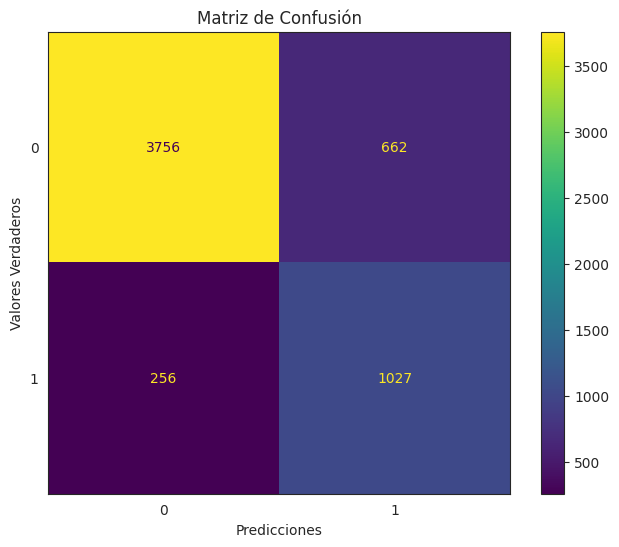

In [141]:
# Inicialización del modelo
mod1 = LogisticRegression(max_iter=1000, class_weight = 'balanced')
# Entrenamiento
mod1.fit(X_tr_log, Y_tr_log)
# Realizar predicciones en el conjunto de validación
Y_pred_mod1 = mod1.predict(X_vl_log)
accuracy_mod1 = metrics.accuracy_score(Y_vl_log, Y_pred_mod1)
precision_mod1 = metrics.precision_score(Y_vl_log, Y_pred_mod1)
recall_mod1 = metrics.recall_score(Y_vl_log, Y_pred_mod1)
f1_mod1 = metrics.f1_score(Y_vl_log, Y_pred_mod1)

cm = metrics.confusion_matrix(Y_vl_log, Y_pred_mod1)
plt.rcParams["axes.grid"] = False
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mod1.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='viridis', values_format='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()

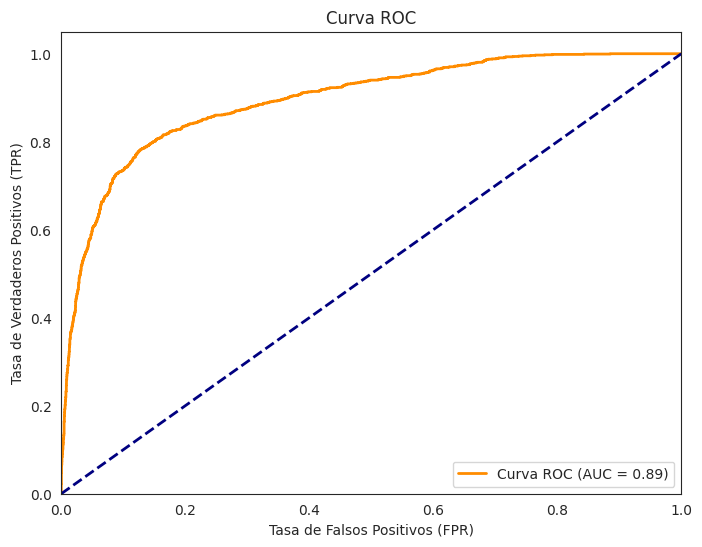

In [142]:
#Probabilidades de predicción en el conjunto de validación
prob_predict_mod1 = mod1.predict_proba(X_vl_log)[:, 1]
fpr1, tpr1, umbrales1 = metrics.roc_curve(Y_vl_log, prob_predict_mod1)

# Calcular el área bajo la curva ROC (AUC)
auc_mod1 = metrics.roc_auc_score(Y_vl_log, prob_predict_mod1)

# Crear la gráfica de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_mod1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## ***7.2 Modelo Nro.2 - Random Forest***

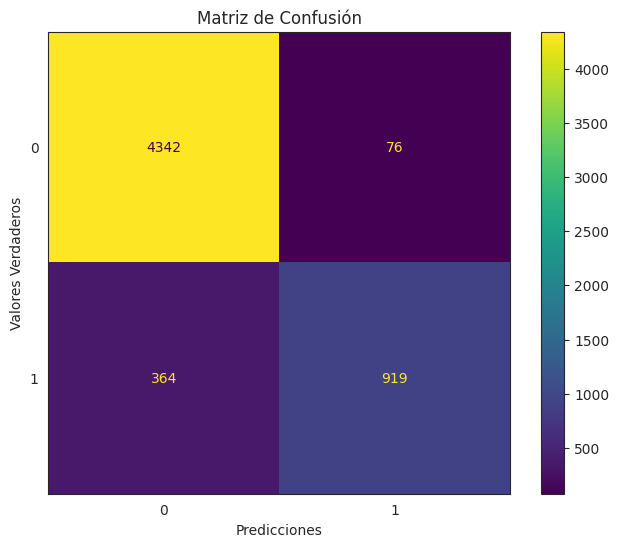

In [143]:
#Dividimos los datos que vamos a usar para ajustar el modelo de RandomForest
datos_tr_RF, datos_vl_RF = train_test_split(dataEnd2, train_size=0.8, random_state=20)
# Extraer la columna Y de los conjuntos de entrenamiento y validación
Y_tr_RF = datos_tr_RF["Y"]
Y_vl_RF = datos_vl_RF["Y"]
# Extraer todas las columnas excepto Y de los conjuntos de entrenamiento y validación
X_tr_RF = datos_tr_RF.drop(columns=["Y"])
X_vl_RF = datos_vl_RF.drop(columns=["Y"])
#Creamos la instancia
mod2 = RandomForestClassifier()
#Ajustamos
mod2.fit(X_tr_RF,Y_tr_RF)
#Predecimos con los datos de validación
Y_pred_mod2 = mod2.predict(X_vl_RF)
#Metricas
accuracy_mod2 = metrics.accuracy_score(Y_vl_RF, Y_pred_mod2)
precision_mod2 = metrics.precision_score(Y_vl_RF, Y_pred_mod2)
recall_mod2 = metrics.recall_score(Y_vl_RF,Y_pred_mod2)
f1_mod2 = metrics.f1_score(Y_vl_RF, Y_pred_mod2)
#Matrix de confusión
cm2 = metrics.confusion_matrix(Y_vl_RF,Y_pred_mod2)
plt.rcParams["axes.grid"] = False
disp2 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = mod2.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp2.plot(ax=ax, cmap='viridis', values_format='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()

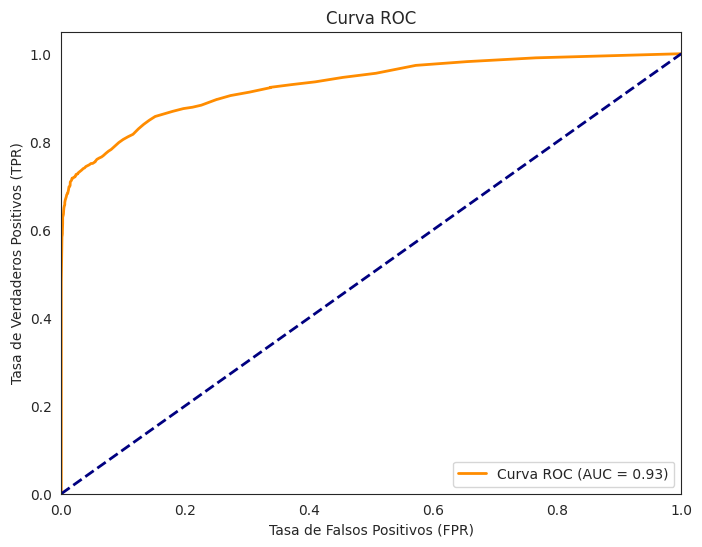

In [144]:
#Probabilidades de predicción en el conjunto de validación
prob_predict_mod2 = mod2.predict_proba(X_vl_RF)[:, 1]
fpr2, tpr2, umbrales2 = metrics.roc_curve(Y_vl_RF, prob_predict_mod2)
# Calcular el área bajo la curva ROC (AUC)
auc_mod2 = metrics.roc_auc_score(Y_vl_RF, prob_predict_mod2)
# Crear la gráfica de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_mod2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## ***7.3 Modelo Nro.3 - K-Nearest Neighbors (KNN)***

Se hicieron variaas iteraciones y se econtro que el k óptimo era 7

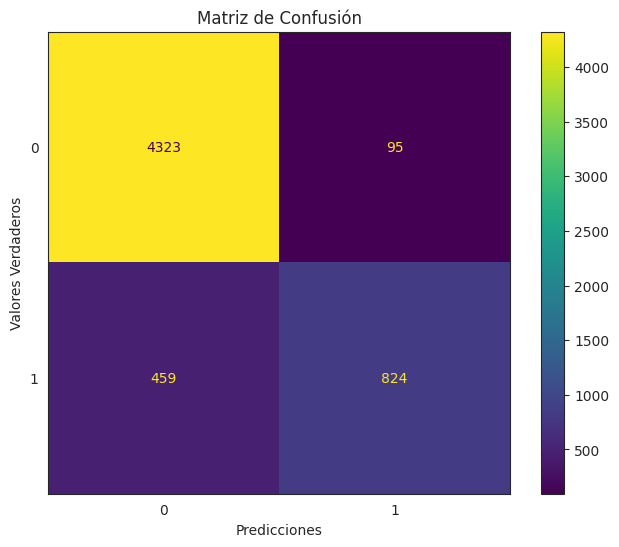

In [145]:
k=7
mod3 = KNeighborsClassifier(n_neighbors=k)
scaler = StandardScaler()
X_tr_estandar = scaler.fit_transform(X_tr_RF)
X_vl_estandar = scaler.transform(X_vl_RF)
# Entrenar el modelo k-NN con los datos de entrenamiento
mod3.fit(X_tr_estandar, Y_tr_RF)
# Predicciones en el conjunto de validación
Y_pred_mod3 = mod3.predict(X_vl_estandar)
#Metricas
accuracy_mod3 = metrics.accuracy_score(Y_vl_RF, Y_pred_mod3)
precision_mod3 = metrics.precision_score(Y_vl_RF, Y_pred_mod3)
recall_mod3 = metrics.recall_score(Y_vl_RF,Y_pred_mod3)
f1_mod3 = metrics.f1_score(Y_vl_RF, Y_pred_mod3)
# Entrenar el modelo k-NN con los datos de entrenamiento
#Matrix de confusión
cm3 = metrics.confusion_matrix(Y_vl_RF,Y_pred_mod3)
disp3 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm3, display_labels = mod2.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp3.plot(ax=ax, cmap='viridis', values_format='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()

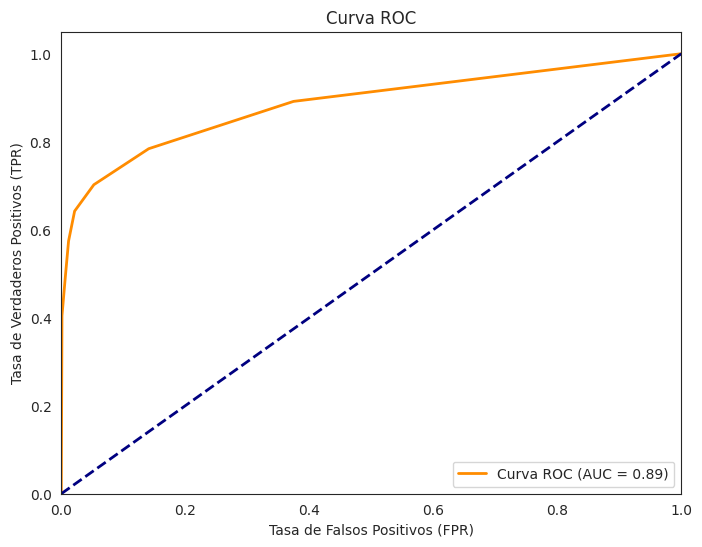

In [146]:
#Probabilidades de predicción en el conjunto de validación
prob_predict_mod3 = mod3.predict_proba(X_vl_estandar)[:, 1]
fpr3, tpr3, umbrales3 = metrics.roc_curve(Y_vl_RF, prob_predict_mod3)
auc_mod3 = metrics.roc_auc_score(Y_vl_RF, prob_predict_mod3)
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_mod3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## ***7.4 Resumen de las metricas obtenidas en los modelos***

In [147]:
# Resumen de las métricas obtenidas
modelo1_metrics = {'Accuracy': accuracy_mod1, 'Precisión': precision_mod1, 'Recall': recall_mod1, 'AUC': auc_mod1}
modelo2_metrics = {'Accuracy': accuracy_mod2, 'Precisión': precision_mod2, 'Recall': recall_mod2, 'AUC': auc_mod2}
modelo3_metrics = {'Accuracy': accuracy_mod3, 'Precisión': precision_mod3, 'Recall': recall_mod3, 'AUC': auc_mod3}
df_metrics = pd.DataFrame([modelo1_metrics, modelo2_metrics, modelo3_metrics],
                          index=['Modelo 1', 'Modelo 2', 'Modelo 3'])
df_metrics

,Accuracy,Precisión,Recall,AUC
Modelo 1,0.838976,0.608052,0.800468,0.893905
Modelo 2,0.922821,0.923618,0.716290,0.928595
Modelo 3,0.902824,0.896627,0.642245,0.885226


Como se puede apreciar, los tres modelos aparentan tener buenas métricas, en especial el modelo 2 presenta mejores indicadores en cuanto exactitud, precisión y auc, y el modelo 1 parece ser el mejor en cuanto a exhaustividad.

Para elegir que modelo es más conveniente hay que analizar varios aspectos en el ámbito crediticio desde el lado del prestamista:

- ¿Cuál tiene un impacto financiero mayor, otorgar un crédito a alguien que podría tener dificultades para pagarlo o rechazar un crédito a alguien con una buena posibilidad de pago sólido?
- ¿Qué me genera más beneficios, otorgarle el crédito a un buen pagador, o no otorgarselo a quien en verdad es mal pagador?

La elección entre los modelos se basa en las necesidades específicas que abordan estas dos preguntas.

 El Modelo 1 sería la opción más adecuada si estamos enfocados en reducir los costos asociados con la identificación errónea de malos pagadores como buenos pagadores. En este caso, el Recall del Modelo 1, que indica que el 80.05% de los casos reales de "incumplimiento de pago" fueron correctamente identificados, significa que solo una de cada cinco personas que eran malos pagadores fue clasificada incorrectamente como buen pagador durante la validación. Un aspecto en contra de este modelo en comparación de los otros dos es la precisión, esta identificando algunos malos pagadores cuando en verdad no lo son, lo que en contexto puede presentar problemas por los recursos que se dejan de recibir y por una estricta política de aceptación de créditos, lo cual puede afectar la satisfacción de los clientes y también el buen nombre de la entidad que otorgue los créditos.

El modelo 2, presenta el valor más alto de exactitud (accuracy) con un 92.1%, representando que el modelo durante la validación acerto aproximadamente en 9.2  de cada 10 casos, aunque hay que tener en cuenta que el indicador es algo engañoso. Si clasifica a alguien como "incumplidor", es muy probable que realmente lo sea (92.28% de las veces). Además, el AUC muestra que este modelo es muy bueno para diferenciar entre las personas que cumplen con sus pagos y las que no. En resumen, es un modelo muy sólido.

Aunque el Modelo 3 tiene métricas decentes en general, ninguna de ellas se destaca de manera significativa en comparación con los otros dos modelos.

Conclusión: Elegimos el Modelo 2 como  mejor modelo, que fue ajustado utilizando el algoritmo de RandomForest, ya que ofrece mejores métricas en términos de exactitud, precisión y AUC. Aunque el Modelo 1 tiene un Recall superior, su precisión no es tan sólida. En general, el Modelo 2 se destaca en múltiples aspectos clave del rendimiento y, por lo tanto, lo consideramos la mejor opción.

# ***8. Creación del ScoreScard***

Se va hacer uso del modelo 2 y el modelo 1 para la creación de un ScoreCard ya que en base a otras experiencias se ha visto que el modelo de regresión es más conveniente en la medida que da un peso puntual a cada variable, lo cuál represenata mejor el Score crediticio final, mientras que el modelo 2 a pesar de que en este caso tiene mejores métricas no trabaja con coeficientes asociados como lo es un modelo de regresión, por lo que se tendría que trabajar con la probabilidad de predicción, y ajustarla a la escala que se vaya trabajar para el Score. A partir del score que tenga mejor representación se va determinar cuál va hacer el elegido para realizar la aplicación.

Para crear el score crediticio en primer lugar se va tener como referencia los puntajes FICO, que son una medida numérica que se utiliza para evaluar la solvencia crediticia de una persona. El rango de puntajes FICO va de 300 a 850, y se divide generalmente en diferentes categorías que indican el nivel de riesgo crediticio del individuo.

Puntajes bajos (300-579): Los puntajes en este rango se consideran "muy pobres" y representan un alto riesgo crediticio. Las personas con puntajes en este rango pueden tener dificultades para obtener crédito y, si lo obtienen, es probable que enfrenten tasas de interés muy altas.

Puntajes justos (580-669): Los puntajes en este rango se consideran "justos" y aún representan un riesgo crediticio moderado. Las personas con puntajes en este rango pueden ser aprobadas para crédito, pero es posible que enfrenten tasas de interés más altas que las personas con puntajes más altos.

Puntajes buenos (670-739): Los puntajes en este rango se consideran "buenos" y representan un riesgo crediticio relativamente bajo. Las personas con puntajes en este rango son más propensas a obtener crédito a tasas de interés competitivas.

Puntajes muy buenos (740-799): Los puntajes en este rango se consideran "muy buenos" y reflejan un riesgo crediticio muy bajo. Las personas con puntajes en este rango son altamente atractivas para los prestamistas y suelen obtener las mejores tasas de interés.

Puntajes excelentes (800-850): Los puntajes en este rango se consideran "excelentes" y representan un riesgo crediticio extremadamente bajo. Las personas con puntajes en este rango tienen acceso a las mejores tasas de interés y términos de crédito.



## ***8.1 ScoreCard para el modelo 2***

Para hacer uso, del modelo de clasificación y poder representar un puntaje en esta escala, vamos a obtener las probabilidades predichas por el modelo, luego se van a escalar esas probabilidades mediante la siguiente fórmula:

$Score = 300 + ((P)*550)$

Donde P representa la probabilidad de cumplimiento, lo que quiere decir que entre más grande sea  la probabilidad de cumplimiento, mayor va ser el Score.

In [148]:
# Crear un DataFrame con los valores reales y predichos
probabilidades_prediccion = mod2.predict_proba(X_vl_RF)  # Obtener las probabilidades
df_predicciones = pd.DataFrame({'loan_status_Real': Y_vl_RF, 'loan_status_predict': Y_pred_mod2, 'probability_of_good_payer': probabilidades_prediccion[:,0]})
# Calcular Score-Preliminary utilizando la fórmula
df_predicciones['Score-Preliminary'] = 300 + ((df_predicciones['probability_of_good_payer']) * 550)
# Redondear Score-Preliminary a valor entero para obtener Score final
df_predicciones['Score final'] = df_predicciones['Score-Preliminary'].astype(int)
# Mostrar el DataFrame resultante
df_predicciones

,loan_status_Real,loan_status_predict,probability_of_good_payer,Score-Preliminary,Score final
737,1,1,0.190000,404.500000,404
24272,0,0,0.960000,828.000000,828
9921,0,0,0.950000,822.500000,822
2495,1,1,0.020000,311.000000,311
3953,0,0,0.880000,784.000000,784
...,...,...,...,...,...
8629,0,0,0.986667,842.666667,842
30796,0,0,1.000000,850.000000,850
31588,0,0,0.730000,701.500000,701
5371,0,0,1.000000,850.000000,850


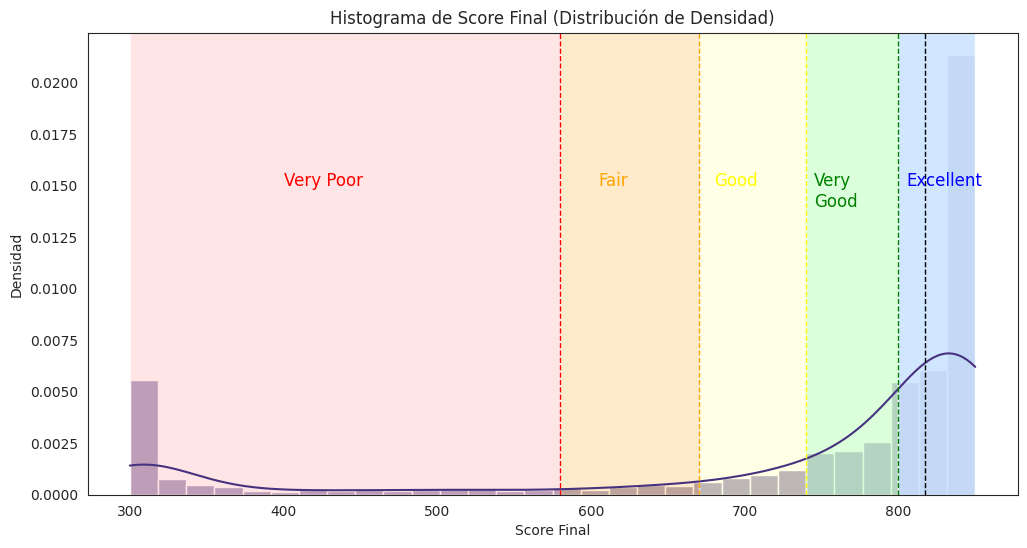

In [149]:

plt.figure(figsize=(12, 6))

# Cambiar el estilo de fondo a blanco
sns.set_style('white')

# Cambiar la paleta de colores y aumentar la opacidad del KDE
sns.histplot(df_predicciones['Score final'], bins=30, kde=True, palette='husl', alpha=0.7, stat='density')

# Calcular la mediana del score
median_score = df_predicciones['Score final'].median()

# Agregar línea punteada vertical en la mediana del score en color negro
plt.axvline(median_score, color='black', linestyle='--', linewidth=1)

# Agregar líneas punteadas verticales en los puntos que dividen los intervalos
vertical_lines = [(580, 'red'), (670, 'orange'), (740, 'yellow'), (800, 'green')]
for x, line_color in vertical_lines:
    plt.axvline(x, color=line_color, linestyle='--', linewidth=1)

# Agregar regiones coloreadas en el fondo del gráfico con los colores definidos
plt.axvspan(300, 580, facecolor='#FFCCCC', alpha=0.5)     # Región roja clara
plt.axvspan(580, 670, facecolor='#FFD699', alpha=0.5)     # Región naranja clara
plt.axvspan(670, 740, facecolor='#FFFFCC', alpha=0.5)     # Región amarilla clara
plt.axvspan(740, 800, facecolor='#CCFFCC', alpha=0.7)     # Región verde clara
plt.axvspan(800, 850, facecolor='#CCE5FF', alpha=0.9)     # Región azul clara

# Agregar etiquetas en las franjas
plt.annotate('Very Poor', xy=(400, 0.0150), fontsize=12, color='red')
plt.annotate('Fair', xy=(605, 0.0150), fontsize=12, color='orange')
plt.annotate('Good', xy=(680, 0.0150), fontsize=12, color='yellow')
plt.annotate('Very', xy=(745, 0.0150), fontsize=12, color='green')
plt.annotate('Good', xy=(745, 0.0140), fontsize=12, color='green')
plt.annotate('Excellent', xy=(805, 0.0150), fontsize=12, color='blue')

# Agregar etiquetas y título
plt.xlabel('Score Final')
plt.ylabel('Densidad')
plt.title('Histograma de Score Final (Distribución de Densidad)')

# Mostrar el histograma
plt.show()

Como se puede ver en el histograma de los Scores finales, si bien pudo segmentar las clases entre buenos pagadores y malos pagadores, a todos los buenos pagadores en una gran proporción les dio Scores muy altos, dandoles la categoría de puntajes excelentes a un gran número, hecho que en verdad no tiene mucho sentido en un contexto crediticio.

## ***8.2 Score card para el modelo 1***

***Cuadro de mandos para determinar el score con el modelo 1***

In [150]:
coeficientes = mod1.coef_
intercepto = mod1.intercept_
# Define the min and max threshholds for our scorecard
min_score = 300
max_score = 850
# Crear un DataFrame con los coeficientes y el intercepto
## IMPORTANTE:  Se multiplican los coeficientes por -1, ya que el valor positivo es que INCUMPLIO, pero nosotros a la persona que CUMPLE es la que le queremos dar más score.
coeficientes_dict = {'Feature name': ['Intercept'] + list(X_tr_log.columns), 'Coefficients': [intercepto[0]] + list(coeficientes[0]*-1)}
df_scorecard = pd.DataFrame(coeficientes_dict)
#Nombre original de la variable
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split('_').str[0]
# calculate the sum of the minimum coefficients of each category within the original feature name
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# calculate the sum of the maximum coefficients of each category within the original feature name
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# create a new columns that has the imputed calculated Score based on the multiplication of the coefficient by the ratio of the differences between
# maximum & minimum score and maximum & minimum sum of cefficients.
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# update the calculated score of the Intercept (i.e. the default score for each loan)
df_scorecard.loc[0, 'Score - Calculation'] = ((df_scorecard.loc[0,'Coefficients'] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# round the values of the 'Score - Calculation' column and store them in a new column
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# check the min and max possible scores of our scorecard
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
#print(min_sum_score_prel)
#print(max_sum_score_prel)
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard

,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,Intercept,0.274515,Intercept,615.506417,616.0,0.493583,616.0
1,X10,-0.023073,X10,-0.741043,-1.0,-0.258957,-1.0
2,X6_A,1.796980,X6,57.714521,58.0,0.285479,58.0
3,X6_B,1.941557,X6,62.357989,62.0,-0.357989,62.0
4,X6_C,1.519103,X6,48.789806,49.0,0.210194,49.0
...,...,...,...,...,...,...,...
90,"X9_[0.23, 0.25)",0.308726,X9,9.915494,10.0,0.084506,10.0
91,"X9_[0.25, 0.28)",0.112204,X9,3.603719,4.0,0.396281,4.0
92,"X9_[0.28, 0.32)",-0.637892,X9,-20.487493,-20.0,0.487493,-20.0
93,"X9_[0.32, 0.38)",-2.459409,X9,-78.990099,-79.0,-0.009901,-79.0


***Fórmula para determinar el score:***

$Score = 616 + X10(-1) + X6\_A(58) + X6\_B(62)  …  + X9\_[0.38, inf)(-87)$

Donde cada variable se reemplaza con unos y ceros, dependiendo a la categoría en que pertenezca en el caso de las variables categóricas y al intervalo en el caso de las variables numéricas.

In [151]:
X_vl_log_score = X_vl_log.copy()
X_vl_log_score.insert(0, 'Intercept', 1)

In [152]:
X_vl_log_score.head()

,Intercept,X10,X6_A,X6_B,X6_C,X6_D,X6_E,X6_F,X6_G,X3_MORTGAGE,...,"X9_[0.15, 0.16)","X9_[0.16, 0.17)","X9_[0.17, 0.19)","X9_[0.19, 0.21)","X9_[0.21, 0.23)","X9_[0.23, 0.25)","X9_[0.25, 0.28)","X9_[0.28, 0.32)","X9_[0.32, 0.38)","X9_[0.38, inf)"
737,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24272,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9921,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2495,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3953,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [153]:
# Obtenemos lo valores asociados a cada variable, del score
scorecard_scores = df_scorecard.set_index('Feature name')['Score - Final']
#Hacemos la multiplicación del score por cada fila de nuestro dataframe de los datos de validación.
X_vl_log_score['Score'] = X_vl_log_score.apply(lambda row: sum(row * scorecard_scores), axis=1)
X_vl_log_score

,Intercept,X10,X6_A,X6_B,X6_C,X6_D,X6_E,X6_F,X6_G,X3_MORTGAGE,...,"X9_[0.16, 0.17)","X9_[0.17, 0.19)","X9_[0.19, 0.21)","X9_[0.21, 0.23)","X9_[0.23, 0.25)","X9_[0.25, 0.28)","X9_[0.28, 0.32)","X9_[0.32, 0.38)","X9_[0.38, inf)",Score
737,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,552.0
24272,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,671.0
9921,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,696.0
2495,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,565.0
3953,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8629,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,697.0
30796,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,708.0
31588,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,630.0
5371,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,643.0


In [164]:
# Crear un DataFrame con los valores reales y predichos
probabilidades_prediccion_mod1 = mod1.predict_proba(X_vl_log)  # Obtener las probabilidades
df_predicciones_mod1 = pd.DataFrame({'loan_status_Real': Y_vl_log, 'loan_status_predict': Y_pred_mod1, 'probability_of_good_payer': probabilidades_prediccion_mod1[:,0]})
df_predicciones_mod1['Score final']=X_vl_log_score['Score']
df_predicciones_mod1
#df_predicciones_mod1[df_predicciones_mod1['Score final']>800]
#len(df_predicciones_mod1[df_predicciones_mod1['Score final'] < 801])/len(df_predicciones_mod1)
#df_predicciones_mod1['Score final'].to_csv('/content/drive/Shareddrives/FdeAnaliticaG4/Proyecto1/score_m1.csv', index=False)

,loan_status_Real,loan_status_predict,probability_of_good_payer,Score final
737,1,1,0.091276,552.0
24272,0,0,0.807226,671.0
9921,0,0,0.901915,696.0
2495,1,1,0.139565,565.0
3953,0,0,0.921576,704.0
...,...,...,...,...
8629,0,0,0.903941,697.0
30796,0,0,0.931620,708.0
31588,0,0,0.547299,630.0
5371,0,0,0.645048,643.0


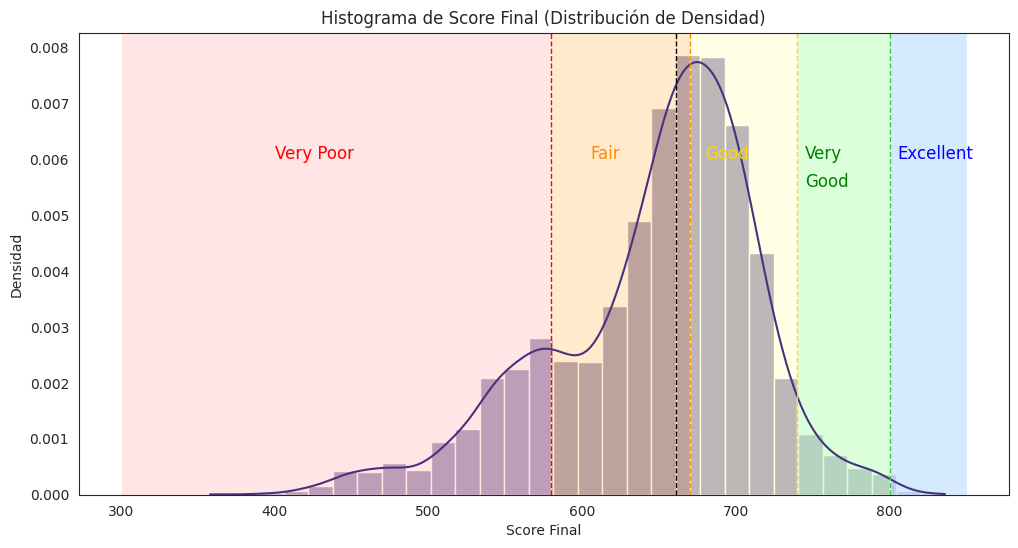

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style('white')
sns.histplot(df_predicciones_mod1['Score final'], bins=30, kde=True, palette='husl', alpha=0.7, stat='density')
median_score = df_predicciones_mod1['Score final'].median()
plt.axvline(median_score, color='black', linestyle='--', linewidth=1)
vertical_lines = [(580, 'red'), (670, 'darkorange'), (740, 'gold'), (800, 'limegreen')]
for x, line_color in vertical_lines:
    plt.axvline(x, color=line_color, linestyle='--', linewidth=1)
plt.axvspan(300, 580, facecolor='#FFCCCC', alpha=0.5)     # Región roja clara
plt.axvspan(580, 670, facecolor='#FFD699', alpha=0.5)     # Región naranja clara
plt.axvspan(670, 740, facecolor='#FFFFCC', alpha=0.5)     # Región amarilla clara
plt.axvspan(740, 800, facecolor='#CCFFCC', alpha=0.7)     # Región verde clara
plt.axvspan(800, 850, facecolor='#CCE5FF', alpha=0.8)     # Región azul clara
plt.annotate('Very Poor', xy=(400, 0.006), fontsize=12, color='red')
plt.annotate('Fair', xy=(605, 0.006), fontsize=12, color='darkorange')
plt.annotate('Good', xy=(680, 0.006), fontsize=12, color='#FFD700')
plt.annotate('Very', xy=(745, 0.006), fontsize=12, color='green')
plt.annotate('Good', xy=(745, 0.0055), fontsize=12, color='green')
plt.annotate('Excellent', xy=(805, 0.006), fontsize=12, color='blue')
plt.xlabel('Score Final')
plt.ylabel('Densidad')
plt.title('Histograma de Score Final (Distribución de Densidad)')
plt.show()

En este caso observamos algo más acorde con la realidad, y que tiene mucha representación de las métricas obtenidas en el modelo, donde se observa es falencia de predecir que una persona incumple cuando en verdad cumple, pero en general los valores que asigna al score tiene apariencia de ser mucho más coherentes con los obtenidos en el modelo 2.

# ***9. Resultados del ScoreCard***

Los resultados de los ScoreCards generados a partir de los modelos 1 y 2 proporcionan una conclusión importante: el modelo 2 es mucho mejor para determinar si alguien podría tener dificultades para pagar. Sin embargo, esta precisión extrema en la clasificación afecta la utilidad de un ScoreCard. Esto se refleja en el histograma de los puntajes finales, donde el modelo 2 asigna puntajes muy altos a las personas que predice que cumplirán y puntajes muy bajos a las personas que predice que no cumplirán. Esto podría no ser lo más adecuado para las personas que desean entender su situación financiera antes de solicitar un crédito.

En contraste, el modelo 1, aunque no tiene métricas tan sólidas como el modelo 2, tiene una ventaja clave. Asigna pesos a las variables de manera más coherente, lo que significa que representa de manera más precisa cuáles factores impactan más en el cálculo del puntaje de una persona.

Por lo tanto, hemos decidido utilizar el ScoreCard basado en el modelo 1, que se basa en una Regresión Logística. Esto nos permite ofrecer una evaluación más equilibrada de la situación financiera de una persona, en lugar de clasificar de manera extrema.

A continuación se van a observar las variables que hacen más riesgosa a una persona:


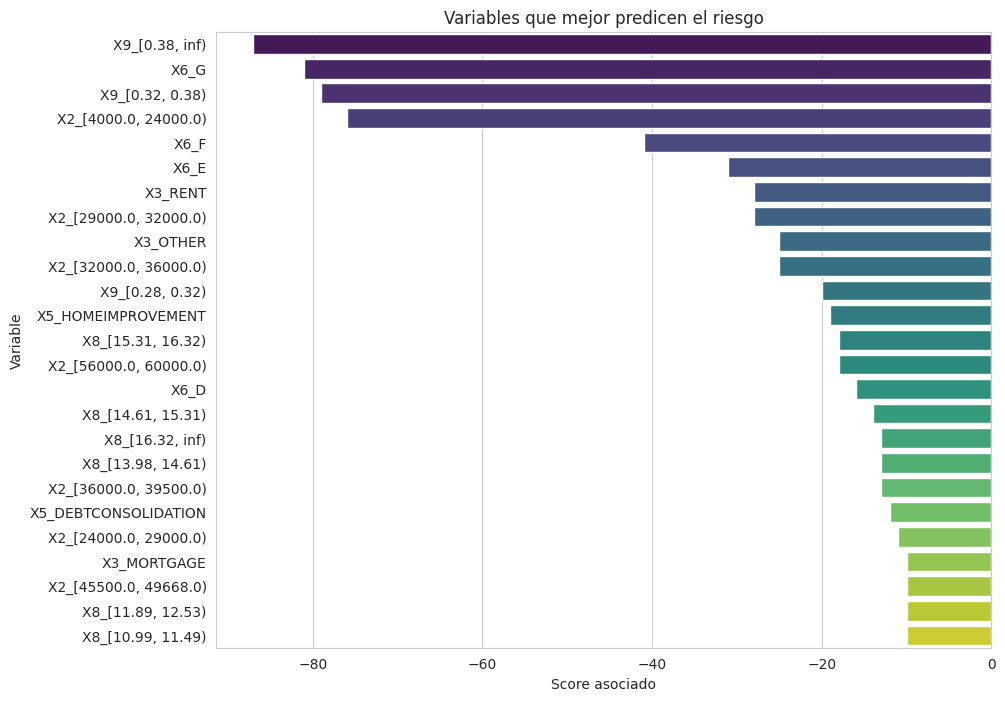

In [ ]:
# Filtrar los valores negativos y ordenar de manera ascendente
scorecard_scores= scorecard_scores.sort_values(ascending=True)
negative_values = scorecard_scores[scorecard_scores < 0].sort_values(ascending=True).head(25)
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.barplot(x=negative_values.values, y=negative_values.index, palette='viridis')
plt.xlabel('Score asociado')
plt.ylabel('Variable')
plt.title('Variables que mejor predicen el riesgo')
plt.show()

Como se puede apreciar las variables que mayor impacto tienen a la hora de predecir el riesgo de otorgar el crédito a una persona es si el porcentaje del prestamo sobre el ingreso es mayor o igual al 38%, si el nivel de riesgo del prestámo esta catalogado como G, si inclusive el porcentje del prestámo sobre el ingreso es mayor al 32%, si el ingreso de la persona esta entre \$4000 y $24000, si el nivel de riesgo es F o G, si la propiedad en la que vive la persona es alquilada.

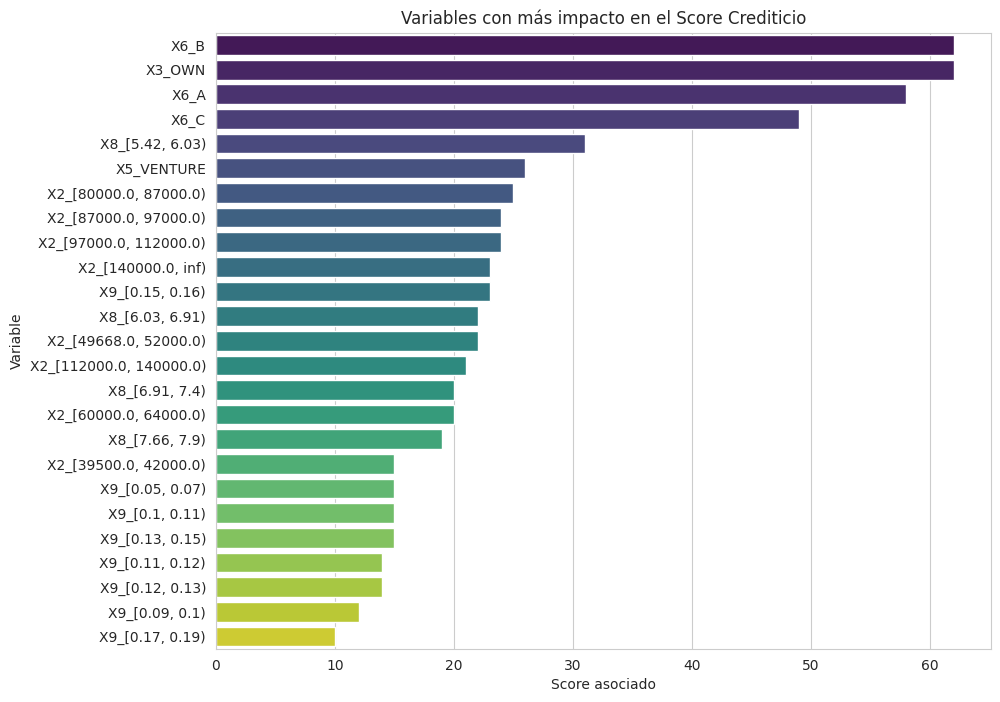

In [ ]:
# Filtrar los valores positivos excluyendo 'Intercept' y ordenar de manera descendente
positive_values = scorecard_scores[(scorecard_scores > 0) & (scorecard_scores.index != 'Intercept')].sort_values(ascending=False).head(25)
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.barplot(x=positive_values.values, y=positive_values.index, palette='viridis')
plt.xlabel('Score asociado')
plt.ylabel('Variable')
plt.title('Variables con más impacto en el Score Crediticio')
plt.show()

En el caso opuesto, las variables que más aportan al Scorecrediticio y predicen que una persona es menos riesgosa es si el nivel de riesgo pertenece a la categoría B,A o C, si la propiedad en la que vive la persona es propia, o si la tasa de interés esta entre 5.42% y 6.03%.